#  1. Problem Tanımı

## 1.1. Seçilen Veri Seti:
Bu projede, **UCI Heart Disease** veri seti kullanılmıştır. Veri seti, bireylerin çeşitli sağlık ölçümleri ve fiziksel özelliklerine göre kalp hastalığı taşıyıp taşımadığını göstermektedir.

## 1.2. Problemin Amacı ve Hedef Değişken:
### 1.2.1. Problemin Amacı
Bu çalışmanın amacı, bireylerin sahip olduğu sağlık verileri (örneğin: yaş, kan basıncı, kolesterol seviyesi, maksimum kalp atış hızı vb.) kullanılarak **kişinin kalp hastalığı riski taşıyıp taşımadığını** tahmin etmektir. Bu bir **sınıflandırma (classification)** problemidir.

### 1.2.2.  Hedef Değişken (Target):
Bu projede, hedef değişken olarak target sütunu belirlenmiştir. Veri setinde yer alan num sütunu, kalp hastalığı durumunu belirtmektedir ve 5 farklı değer içermektedir:

- 0: Kişide kalp hastalığı riski yok

- 1, 2, 3, 4: Kişi kalp hastalığı riski taşıyor

Bu nedenle, num sütunu ikili (binary) hale getirilerek şu şekilde target değişkenine dönüştürülmüştür:

- target = 0 → num = 0 olan bireyler (kalp hastalığı riski yok)

- target = 1 → num = 1, 2, 3, 4 olan bireyler (kalp hastalığı riski var)

Bu dönüşüm sayesinde sınıflandırma algoritmaları için uygun, ikili bir hedef değişken elde edilmiştir.

## 1.3. Tahminin Pratikteki Önemi:
Kalp hastalıkları dünya genelinde önde gelen ölüm nedenleri arasında yer almaktadır. Erken teşhis, hastalığın tedavi edilmesi ve yaşam kalitesinin korunması açısından kritik öneme sahiptir.  
Makine öğrenmesi modelleri ile bu tür risklerin önceden tahmin edilmesi, **sağlık hizmetlerine daha hızlı erişim**, **önleyici tedavi planlarının oluşturulması** ve **doktorlara destekleyici karar sistemleri sağlanması** açısından büyük katkı sunabilir.


# 2. Keşifsel Veri Analizi (Exploratory Data Analysis)

## 2.1. Kütüphanelerin Yüklenmesi

In [ ]:
!pip install catboost

In [ ]:
# ==========================
# Temel Kütüphaneler
# ==========================
import pandas as pd
import numpy as np

# ==========================
# Görselleştirme
# ==========================
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ==========================
# İstatistiksel Analiz
# ==========================
from scipy import stats
from scipy.stats import skew

# ==========================
# Veri Ön İşleme
# ==========================
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer

# ==========================
# Modelleme & Değerlendirme
# ==========================
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

In [ ]:
import warnings # warningleri kapatma
warnings.filterwarnings("ignore")

## 2.2. Veri Setini Yükleme

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Veri setinin yolunu belirtin
data_path ='/content/drive/MyDrive/yz_akademi_bitirme/heart_disease_uci.csv'

df = pd.read_csv(data_path, encoding='ISO-8859-9')

## 2.3. Veri Setinin Genel Yapısını İnceleme  

In [ ]:
def check_df(dataframe, head=5, tail=5, info=True, describe=True):
    print("========================== # Shape # ==========================")
    print(dataframe.shape)

    print("\n========================== # Types # ==========================")
    print(dataframe.dtypes)

    if info:
        print("\n========================== # Info # ==========================")
        dataframe.info()

    print("\n========================== # Head # ==========================")
    print(dataframe.head(head))

    print("\n========================== # Tail # ==========================")
    print(dataframe.tail(tail))

    print("\n========================== # Eksik Değerler (Missing Values)  # ==========================")
    print(dataframe.isnull().sum())

    # Eksik değerlerin yüzde hesabı
    def missing_percentage(df):
        missing_counts = df.isnull().sum()
        missing_percent = 100 * missing_counts / len(df)
        missing_df = pd.DataFrame({'Eksik Değer Sayısı': missing_counts, 'Eksik Değer (%)': missing_percent})
        return missing_df[missing_df['Eksik Değer Sayısı'] > 0].sort_values(by='Eksik Değer (%)', ascending=False)

    print("\n========================== # Eksik Değerlerin Yüzdelik Dağılımı # ==========================")
    print(missing_percentage(dataframe))


    print("\n========================== # Benzersiz Değerler  # ==========================")
    print(dataframe.nunique())

    if 'attack_cat' in dataframe.columns:
        print("\n========================== # Sütun Bazlı Benzersiz Değer  # ==========================")
        print(dataframe['attack_cat'].unique())


    if describe:
        print("\n========================== # Describe # ==========================")
        print(dataframe.describe().T)

# Fonksiyon çağrısı
check_df(df)


========================== # Shape # ==========================
(920, 16)

========================== # Types # ==========================
id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

========================== # Info # ==========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fb

| Sütun | Türkçe Açıklama | Örnek Değerler |
| --- | --- | --- |
| id | Her gözleme ait benzersiz kimlik numarası. | 1 |
| age | Hastanın yaşı (yıl). | 63 |
| sex | Cinsiyet. | Male / Female |
| dataset | Kaynağa ait alt‑veri seti adı. | Cleveland |
| cp | Göğüs ağrısı tipi:<br>• typical angina<br>• atypical angina<br>• non‑anginal pain<br>• asymptomatic | typical angina |
| trestbps | İstirahat kan basıncı (mm Hg). | 145 |
| chol | Serum kolesterolü (mg/dl). | 233 |
| fbs | Açlık kan şekeri > 120 mg/dl? | True / False |
| restecg | İstirahat EKG sonucu:<br>• normal<br>• lv hypertrophy<br>• st‑t abnormal | lv hypertrophy |
| thalch | Maksimum kalp atım hızı (thalach). | 150 |
| exang | Egzersize bağlı anjina? | True / False |
| oldpeak | Egzersize bağlı ST depresyonu. | 2.3 |
| slope | Egzersiz ST segmenti eğimi:<br>• upsloping<br>• flat<br>• downsloping | downsloping |
| ca | Floroskopi ile renklendirilmiş ana damar sayısı (0‑3). Koroner damar tıkanıklığı| 0 |
| thal | Talasemi testi sonucu:<br>• normal<br>• fixed defect<br>• reversable defect | fixed defect |
| num | Orijinal hastalık derecesi (0: yok, 1‑4: var). | 0 |

## Veri Kümesi Genel Özeti

| Metri̇k | Değer |
|---|---|
| Satır (Gözlem) | **920** |
| Sütun | **16** |
| Hedef Değişken | `num` (0: hastalık yok, 1‑4: var) |


###  Değişken Tipleri
| Tür | Adet | Sütunlar |
|---|---|---|
| Tam Sayı (int64) | 3 | id, age, num |
| Ondaklıklı Sayı Türleri (float64) | 5 | trestbps, chol, thalch, oldpeak, ca |
| Kategorik (object) | 8 | sex, dataset, cp, fbs, restecg, exang, slope, thal |

---

### Eksik Değer Analizi
| Sütun | Eksik (n) | Eksik (%) | Durum |
|---|---|---|---|
| **ca** | 611 | 66.4% | ⚠️ Çok yüksek |
| **thal** | 486 | 52.8% | ⚠️ Çok yüksek |
| **slope** | 309 | 33.6% | Yüksek |
| **fbs** | 90 | 9.8% | Düşük |
| **oldpeak** | 62 | 6.7% | Düşük |
| **trestbps** | 59 | 6.4% | Düşük |
| **thalch** | 55 | 6.0% | Düşük |
| **exang** | 55 | 6.0% | Düşük |
| **chol** | 30 | 3.3% | Düşük |
| **restecg** | 2 | 0.2% | Düşük |

> **Notlar**  
> * `ca` ve `thal` sütunlarında ciddi eksik veri mevcut; modellemeden önce özel imputasyon ya da sütunu hariç tutma değerlendirilmeli.  
> * `slope` için de yüksek oranda eksik kayıt var (≈34%).  

---

### Sayısal Değişken Özet İstatistikleri
| Değişken | Ortalama | Std | Min | %25 | Median | %75 | Max |
|---|---|---|---|---|---|---|---|
| age | 53.5 | 9.4 | 28 | 47 | 54 | 60 | 77 |
| trestbps | 132.1 | 19.1 | **0** | 120 | 130 | 140 | 200 |
| chol | 199.1 | 110.8 | **0** | 175 | 223 | 268 | 603 |
| thalch | 137.5 | 25.9 | 60 | 120 | 140 | 157 | 202 |
| oldpeak | 0.88 | 1.09 | **–2.6** | 0 | 0.5 | 1.5 | 6.2 |
| ca | 0.68 | 0.94 | 0 | 0 | 0 | 1 | 3 |
| num | 1.00 | 1.14 | 0 | 0 | 1 | 2 | 4 |

> **Aykırı / Şüpheli Değerler**  
> * `trestbps` ve `chol` sütunlarındaki **0** değerleri büyük olasılıkla eksik bilgi → NaN kabul edilmeli.  
> * `oldpeak` sütunundaki negatif değerler titizlikle ele alınmalı.

---

### Hedef Değişken Dağılımı (`num`)
*Özet bilgi*: Veri kümesi hastalık derecelerini 0‑4 arası kodluyor. Modelleme için **ikili** (`target = num > 0`) çözüme geçmek dengesizliği azaltacaktır.

---


## 2.4. Hedef Dönüşümü: `target = (num > 0).astype(int)`

In [ ]:
df["target"] = (df["num"] > 0).astype(int)


In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


**df["target"] sütunu:**

- num = 0 olanlar için 0 (hastalık yok),

- num > 0 olanlar için 1 (hastalık var)

şeklinde ikili hale getirildi. Bu, sınıflandırma modelleri için çok daha dengeli ve anlamlı bir hedef değişken yapısıdır.

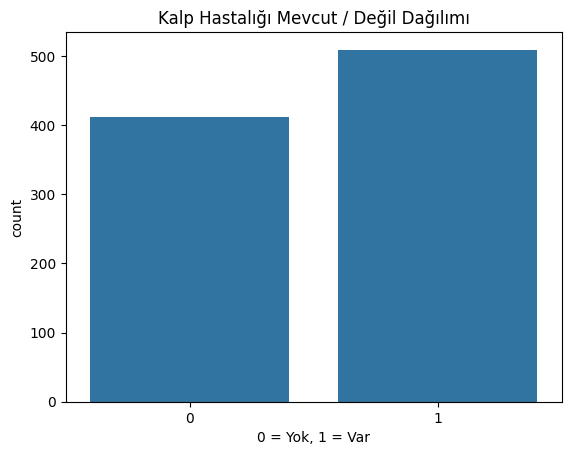

target
1    55.3
0    44.7
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x="target", data=df)
plt.title("Kalp Hastalığı Mevcut / Değil Dağılımı")
plt.xlabel("0 = Yok, 1 = Var")
plt.show()

print(df["target"].value_counts(normalize=True).mul(100).round(1))


- **1 (hastalıklı)   →  %55.3**
- **0 (sağlıklı)     →  %44.7**



Bu şu anlama gelir:

**Sınıflar neredeyse dengeli** → SMOTE, class_weight gibi teknikleri kullanmana şimdilik gerek yok.

**Accuracy metriği yanıltıcı olmayacak.** (Dengesiz sınıflarda accuracy anlamsız hale gelir, ama burada kullanılabilir.)

**ROC-AUC, Precision, Recall, F1 gibi metrikleri kullanmak hâlâ mantıklı ama “veri dengesiz” uyarısına ihtiyaç kalmadı.**

## 2.5  Veri Görselleştirme (EDA)

In [ ]:
# 1) Korelasyon ısı haritası
def plot_corr(dataframe):
    num_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(10, 8))
    corr = dataframe[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", square=True)
    plt.title("Sayısal Değişkenler Korelasyon Matrisi")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------

# 2) Histogram + KDE
def plot_hist_kde(dataframe, col, bins=30):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=dataframe, x=col, bins=bins, kde=True, color='skyblue')
    plt.title(f"{col} - Histogram + KDE")

    # Çarpıklık (skewness) hesapla
    skewness = skew(dataframe[col].dropna())

    plt.text(
        x=0.95, y=0.05,
        s=f"Skewness: {skewness:.3f}",
        ha='right', va='bottom',
        transform=plt.gca().transAxes,
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray", alpha=0.7)
    )

    plt.tight_layout()
    plt.show()

# ---------------------------------------------

# 3) Eksik Değerler
def plot_missing_values(dataframe):
    na = dataframe.isnull().sum()
    na = na[na > 0]
    if not na.empty:
        plt.figure(figsize=(8, 4))
        na.sort_values().plot(kind='barh', color='#ff6666')
        plt.title("Eksik Değerler")
        plt.xlabel("Sayı")
        plt.tight_layout()
        plt.show()
    else:
        print("Eksik değer yok.")

# ---------------------------------------------

# 4) Hedefe Göre Özet İstatistik Tablosu
def target_summary(df, target="target"):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    summary = df.groupby(target)[num_cols].agg(["mean", "median"]).T
    display(summary)


# --------------------------------------------

# 5) Target’a Göre Box + Violin kombosu
def plot_box_violin(df, col, target="target", figsize=(6,4)):
    """
    Tek değişkenin dağılımını hedef sınıflarına göre box + violin.
    """
    plt.figure(figsize=figsize)
    sns.violinplot(x=target, y=col, data=df, inner=None, palette="RdBu")
    sns.boxplot(x=target, y=col, data=df, width=.2, color="k", showcaps=False,
                boxprops={'facecolor':'none'}, showfliers=False, whiskerprops={'linewidth':0})
    plt.title(f"{col} dağılımı – {target} sınıfları")
    plt.tight_layout()
    plt.show()

# --------------------------------------------

# 6) Eksik Değer Isı Haritası (hızlı genel bakış)
def plot_missing_heatmap(df, figsize=(10,6)):
    """DataFrame genelinde eksik değer var mı yok mu hızlı ısı haritası."""
    plt.figure(figsize=figsize)
    sns.heatmap(df.isnull(), cbar=True, yticklabels=True, cmap='Blues')
    plt.title("Eksik Değer Isı Haritası")
    plt.tight_layout()
    plt.show()


# -------------------------------------------------
# 7) ECDF Grafiği
def plot_ecdf(df, col, hue=None, figsize=(6,4)):
    """
    Sürekli değişkenler için ECDF – özellikle medyan, percentil kesişimleri net gösterir.
    """
    from statsmodels.distributions.empirical_distribution import ECDF
    plt.figure(figsize=figsize)

    colors = ['#ff3333', '#3366ff']

    if hue:
        for i, (name, grp) in enumerate(df.groupby(hue)):
            ecdf = ECDF(grp[col].dropna())
            plt.step(ecdf.x, ecdf.y, label=str(name), color=colors[i % len(colors)])
    else:
        ecdf = ECDF(df[col].dropna())
        plt.step(ecdf.x, ecdf.y, color='#3366ff')

    plt.xlabel(col)
    plt.ylabel("ECDF")
    plt.title(f"{col} – Empirik Kümülatif Dağılım")
    if hue:
        plt.legend()
    plt.tight_layout()
    plt.show()
# -------------------------------------------------
# 8) Çift Sürekli Değişken Arası Dağılım + Reg Çizgisi
def plot_scatter_reg(df, x, y, hue=None, add_kde=False, figsize=(6,4)):
    """
    Scatter + (opsiyonel) doğrusal regresyon çizgisi. add_kde=True => arka plan joint KDE.
    """
    if add_kde:
        g = sns.jointplot(data=df, x=x, y=y, hue=hue, kind="kde", fill=True, height=6, alpha=.4, palette="RdBu")
        sns.scatterplot(data=df, x=x, y=y, hue=hue, ax=g.ax_joint, edgecolor="w", s=40)
        g.ax_joint.set_title(f"{x} vs {y}")
    else:
        plt.figure(figsize=figsize)
        sns.scatterplot(data=df, x=x, y=y, hue=hue, edgecolor="w", s=60, alpha=.7, palette="RdBu")
        sns.regplot(data=df, x=x, y=y, scatter=False, color="k", line_kws=dict(alpha=.6))
        plt.title(f"{x} vs {y} (+reg line)")
        plt.tight_layout()
    plt.show()

#-------------------------------------------------
# 9) Kategorik Değişkenlere Göre Hedef Değişken Pozitif Oranlarının Görselleştirilmesi
def plot_target_rate(
        df,
        cat_col,
        target="target",
        pos_label=1,
        min_count=20,
        sort_by="rate",
        ascending=False,
        palette="RdBu",
        figsize=(8, 4),
    ):
    """
    Bir kategorik değişkenin her bir sınıfı için:
      • Pozitif target oranı (%)
      • Toplam gözlem sayısı
    Bar grafikte yan yana gösterir.

    Parameters
    ----------
    df : pd.DataFrame
    cat_col : str
        İnceleyeceğin kategorik sütun.
    target : str, default "target"
        Hedef değişken adı (ikili veya çoklu olur; pos_label kullanılır).
    pos_label : int/str/bool, default 1
        "Pozitif" olarak kabul edilecek target değeri.
    min_count : int, default 20
        Daha az gözleme sahip kategoriler grafikten çıkarılır.
    sort_by : {"rate","count"}, default "rate"
        Hangi metriğe göre sıralansın?
    ascending : bool, default False
        Sıralama yönü.
    palette : str or list, default "rocket"
        seaborn renk paleti.
    figsize : tuple, default (8,4)
        Figure boyutu.
    """
    # ----  hazırlanış
    tmp = (
        df.groupby(cat_col)[target]
          .agg(rate=lambda x: (x == pos_label).mean() * 100,
               count="size")
          .query("count >= @min_count")
    )
    tmp = tmp.sort_values(sort_by, ascending=ascending)

 #--- çizim

    plt.figure(figsize=figsize)
    sns.barplot(x=tmp.index, y="rate", data=tmp, palette=palette)
    plt.ylabel("Pozitif Oran (%)")
    plt.xlabel(cat_col)
    plt.title(f"{cat_col}  →  {target} (% ve n≥{min_count})")

    for i, (pct, cnt) in enumerate(zip(tmp["rate"], tmp["count"])):
        plt.text(i, pct + 1, f"n={cnt}", ha="center", va="bottom", fontsize=9)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


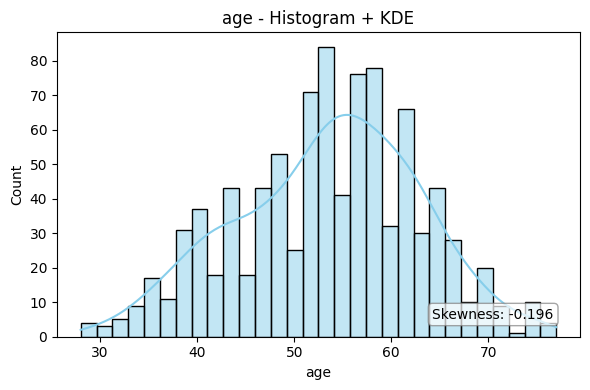

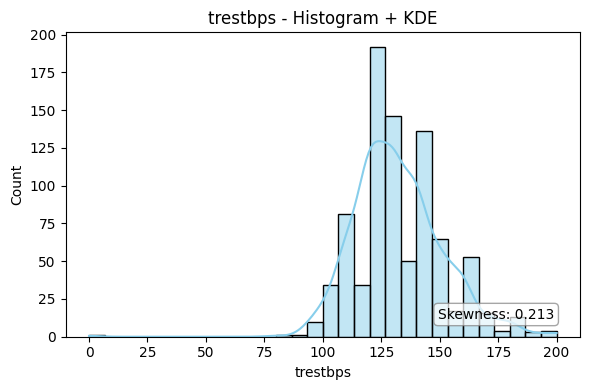

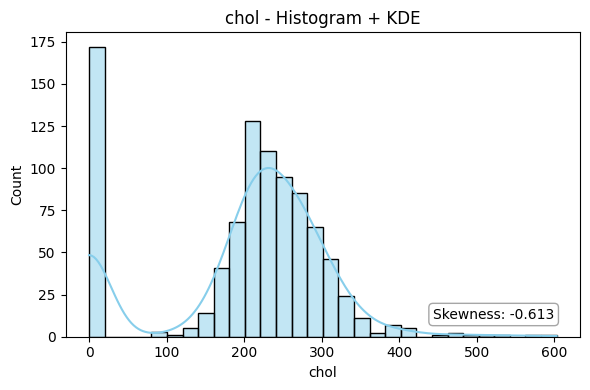

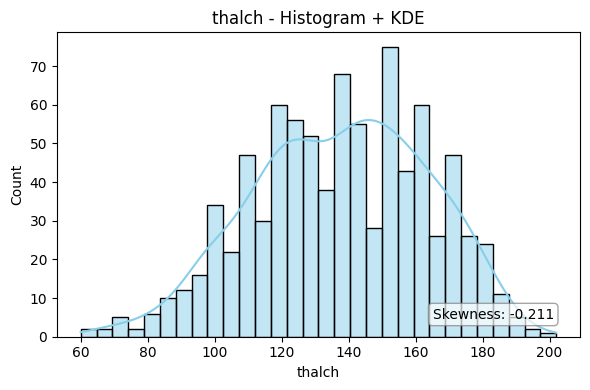

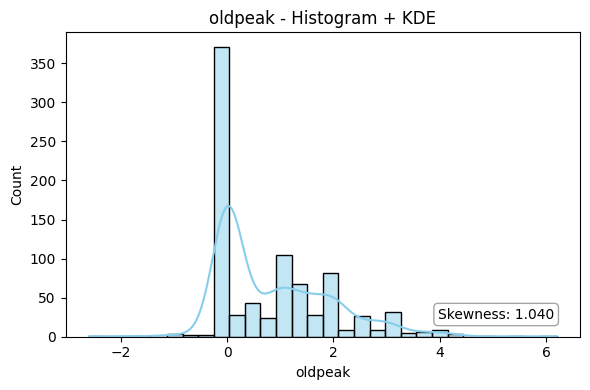

In [ ]:
# Temel dağılımlar – hist+KDE
for col in ["age", "trestbps", "chol", "thalch", "oldpeak"]:
    plot_hist_kde(df, col, bins=30)

## 📉 Histogram + KDE Gözlemleri

| Değişken                 | Çarpıklık Yönü                            | Aykırı Değer Potansiyeli                         | Kısa Not                                             | Boxplot / Violin Çizimi Gerekliliği                  |
|--------------------------|------------------------------------------|-------------------------------------------------|------------------------------------------------------|------------------------------------------------------|
| **chol** (Kolesterol)    | Sola çarpık (Skewness: -0.613)           | Yüksek – > 500 mg/dl gözlemler winsorize / filtre gerekebilir | Medikal üst limiti aşan kayıtlar var.                | **Kesinlikle Gerekli** - Güçlü aykırı değerler       |
| **age** (Yaş)            | Yaklaşık simetrik (Skewness: -0.196)     | Düşük – 28‑77 arası doğal dağılım                | Yaklaşık normal dağılım.                              | **Gereksiz** – Dağılım simetrik, aykırı değer az     |
| **thalch** (Maks. kalp hızı) | Sola çarpık (Skewness: -0.211)           | Orta – < 80 veya > 190 bpm uç noktalar           | Atletik birey / ölçüm hatası olabilir                | **Gerekli** – Uç noktalar ve potansiyel hatalar için  |
| **trestbps** (İstirahat KB) | Hafif sağa çarpık (Skewness: 0.213)      | Orta-Yüksek – 0 ve 180‑200 mmHg kayıtları        | Hafif sağa çarpık                                    | **Gerekli** – Düşük ve yüksek uç noktaları incelemek |
| **oldpeak** (ST depresyonu) | Güçlü sağa çarpık (Skewness: 1.040)      | Yüksek – > 4 kümesi            |  4‑6 arası uç değer | **Gerekli** – Aykırı değerler içeriyor

---

### Çarpıklık Tanımları  
- **Sağa çarpık:** Sağ kuyruğu uzun, büyük değerlere kayık dağılım  
- **Sola çarpık:** Sol kuyruğu uzun, küçük değerlere kayık dağılım  

---

### 🎯 Boxplot / Violin Çizilmesi Önerilen Değişkenler

- **chol:** 500 mg/dl üzeri outlier’ları saptamak için ve daha da önemlisi 0 olan değerleri incelemek için **kesinlikle gerekli**  
- **trestbps:** 0 ve > 180 mmHg kayıtları görmek için **gerekli**  
- **oldpeak:** > 4 değerlerini incelemek için **gerekli**  
- **thalch:** < 80 / > 190 bpm uç noktaları görmek için **gerekli**  
- **age:** Dağılım simetrik ve aykırı değer az olduğundan **gerekli değil**



In [ ]:
def plot_multiple_boxplots(dataframe, cols, colors=None):
    import matplotlib.pyplot as plt
    import seaborn as sns


    if colors is None:
        colors = [
            '#ffcccc',
            '#ff6666',
            '#b30000',
            '#cce5ff',
            '#3399ff',
            '#004080'
        ]

    n = len(cols)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 4))
    if n == 1:
        axes = [axes]

    for i, col in enumerate(cols):
        c = colors[i % len(colors)]
        sns.boxplot(x=dataframe[col], ax=axes[i], color=c)
        axes[i].set_title(f'{col} Boxplot')

    plt.tight_layout()
    plt.show()



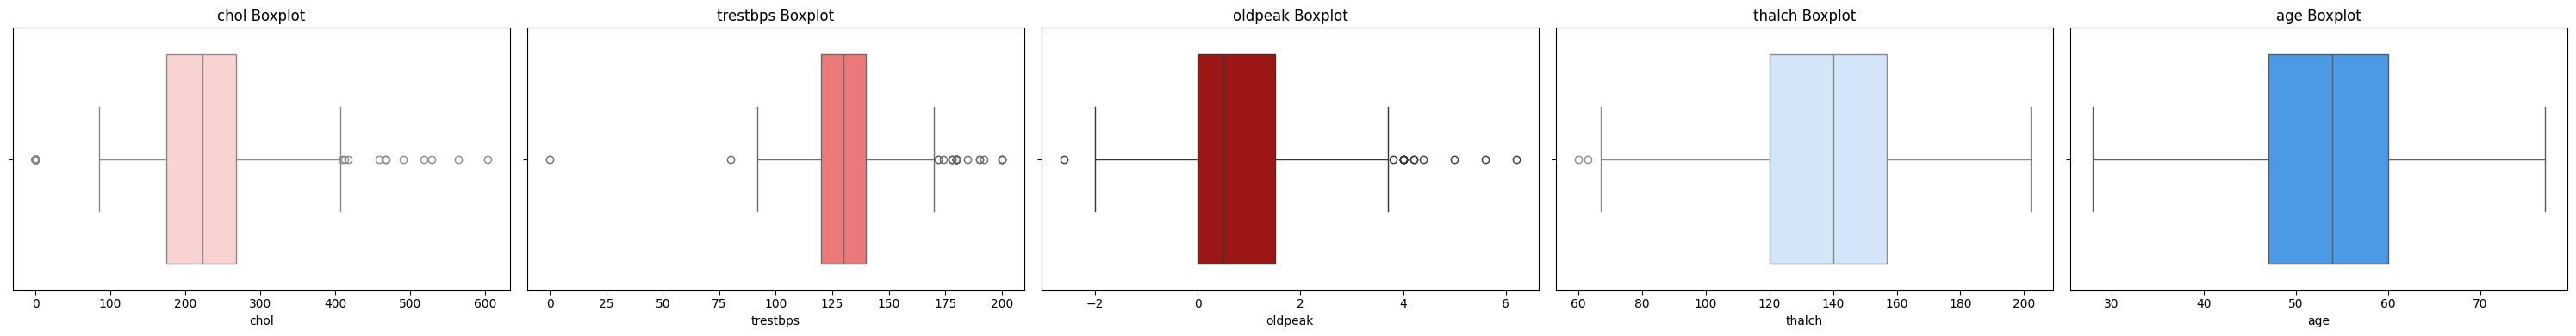

In [ ]:
plot_multiple_boxplots(df, ['chol', 'trestbps', 'oldpeak', 'thalch', 'age'])


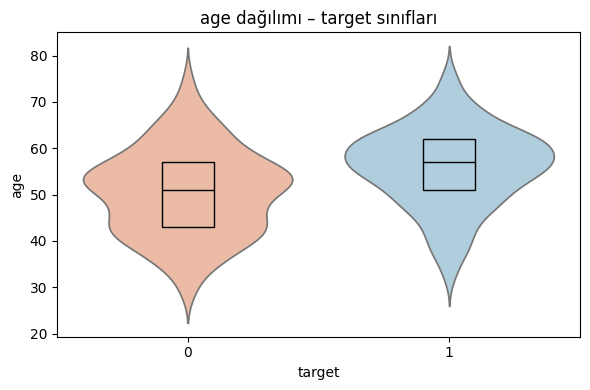

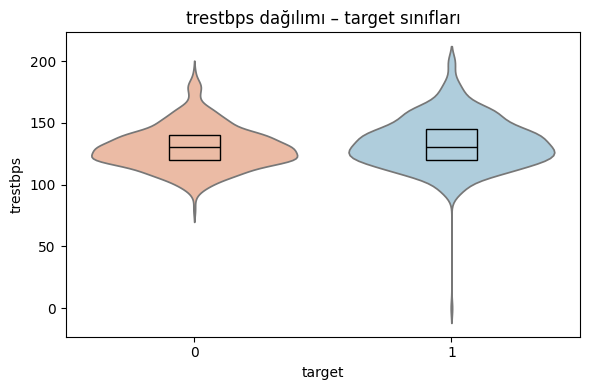

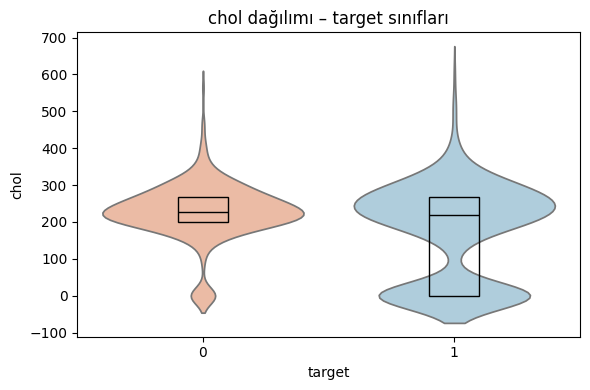

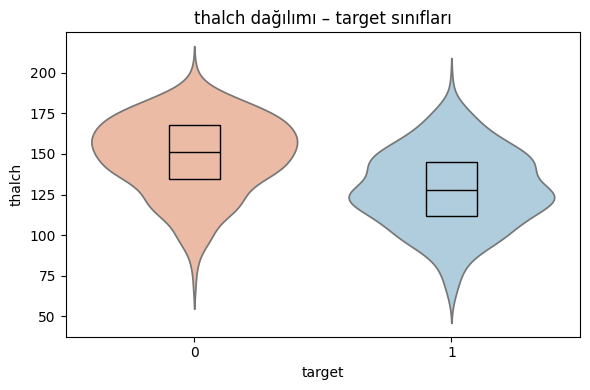

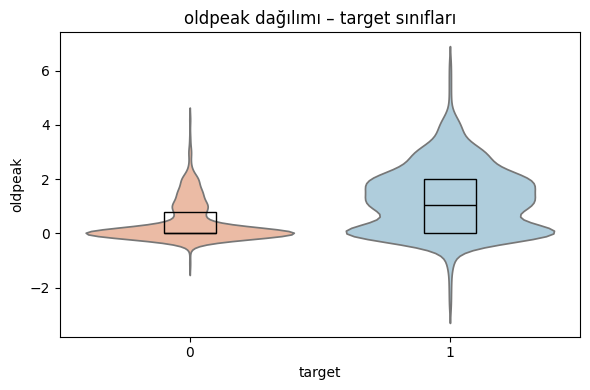

In [ ]:
# Box + Violin ile hedef farkları
for col in ["age", "trestbps", "chol", "thalch", "oldpeak"]:
    plot_box_violin(df, col)

## Boxplot Analizi: Değişkenlerin Dağılımı ve Aykırı Değerler

### Chol (Kolesterol)
- Medyan: ~220 mg/dL civarında  
- IQR (Çeyrekler arası genişlik): ~180-280 mg/dL  
- Sağ tarafta birçok aykırı değer var (400+ mg/dL)  
- Dağılım sola çarpık  

### Trestbps (İstirahat Kan Basıncı)
- Medyan: ~130 mmHg civarında  
- IQR: ~120-140 mmHg  
- Hem üst hem alt tarafta aykırı değerler mevcut, daha çok üst tarafta  

### Oldpeak (ST Depresyonu)
- Medyan: ~1.0 civarında  
- IQR: ~0-2.0  
- Üst tarafta çok sayıda aykırı değer (4+ değerler)  
- Belirgin sağa çarpık dağılım  

### Thalch (Maksimum Kalp Hızı)
- Medyan: ~140 bpm civarında  
- IQR: ~120-160 bpm  
- Alt tarafta az sayıda aykırı değer var  

### Age (Yaş)
- Medyan: ~55 yaş civarında  
- IQR: ~48-60 yaş  
- Aykırı değer yok  
- En normal dağılıma sahip değişken  

---

### Önemli Gözlemler
- Oldpeak, Trestbps ve Chol değişkenlerinde en fazla aykırı değer bulunuyor.  
- Age değişkeni en temiz ve en normal dağılıma sahip.  
- Aykırı değerler veri kalitesi ve modelleme açısından önemlidir.  
- Bu aykırı değerler gerçek tıbbi durumları yansıtıyor olabilir (örneğin, çok yüksek kolesterol, negatif oldpeak).  

---


In [ ]:
# Hedefe göre özet istatistik tablosu
target_summary(df)

target                    0           1
id       mean    355.257908  545.479371
         median  345.000000  608.000000
age      mean     50.547445   55.903733
         median   51.000000   57.000000
trestbps mean    129.913043  133.978723
         median  130.000000  130.000000
chol     mean    227.905612  176.479920
         median  228.000000  218.000000
thalch   mean    148.800512  128.261603
         median  151.000000  128.000000
oldpeak  mean      0.418205    1.262607
         median    0.000000    1.050000
ca       mean      0.278788    1.131944
         median    0.000000    1.000000
num      mean      0.000000    1.799607
         median    0.000000    1.000000
target   mean      0.000000    1.000000
         median    0.000000    1.000000

| Değişken | Target=0 (Ortalama) | Target=1 (Ortalama) | Target=0 (Medyan) | Target=1 (Medyan) | Yorum                                                                                  |
|----------|---------------------|---------------------|-------------------|-------------------|---------------------------------------------------------------------------------------|
                                    |
| age      | 50.55               | 55.90               | 51.00             | 57.00             | Hastalık grubundaki bireyler daha yaşlı, yaş kalp hastalığı ile ilişkili olabilir.    |
| trestbps | 129.91              | 133.98              | 130.00            | 130.00            | Tansiyon değerleri hastalık grubunda biraz daha yüksek.                              |
| chol     | 227.91              | 176.48              | 228.00            | 218.00            | Kolesterol hastalıklı grupta beklenmedik şekilde daha düşük, dikkatle incelenmeli.    |
| thalch   | 148.80              | 128.26              | 151.00            | 128.00            | Maksimum kalp atış hızı hastalıklı grupta anlamlı derecede düşük.                     |
| oldpeak  | 0.42                | 1.26                | 0.00              | 1.05              | Egzersiz sonrası ST depresyonu (oldpeak) hastalıklı grupta yüksek, hastalığı gösterir.|
| ca       | 0.28                | 1.13                | 0.00              | 1.00              | Hastalıklı grupta daha fazla damar etkilenmiş (ca yüksek).                            |
| num      | 0.00                | 1.80                | 0.00              | 1.00              | Hastalık şiddetini gösteren num değeri, hasta grubunda mantıken daha yüksek.  Çünkü target (Hastalık) bu değişkenden türetildi.                       |
| target   | 0.00                | 1.00                | 0.00              | 1.00              | Hedef değişken, 0 = sağlıklı, 1 = kalp hastalığı var.                                |



## 📊 Sayısal Değişkenlerin Hedefe Göre Dağılımları

### Age (Yaş)
- Kalp hastalığı olan bireylerin yaşı daha yüksek.
- Yaş arttıkça kalp hastalığı riski artıyor olabilir.

### Trestbps (İstirahat Kan Basıncı)
- Target=1 grubunda ortalama daha yüksek.
- Sağlıklı bireylerde daha düşük.

### Chol (Kolesterol)
- Her iki grupta da dağılmış ama aykırı yüksek değerler var.
- Normalleştirme veya winsorize yapılabilir.

### Thalch (Maksimum Kalp Hızı)
- Target=1 olan bireylerde belirgin şekilde daha düşük.
- Bu, önemli bir sınıflandırıcı olabilir.

### Oldpeak (ST Segment Depresyonu)
- Target=1 için çok daha yüksek.
- Güçlü bir ayırıcı özellik.  
- Ayrıca dağılımı çok çarpık → Dönüşüm (örneğin log1p) ya da winsorizing gerekebilir.

---

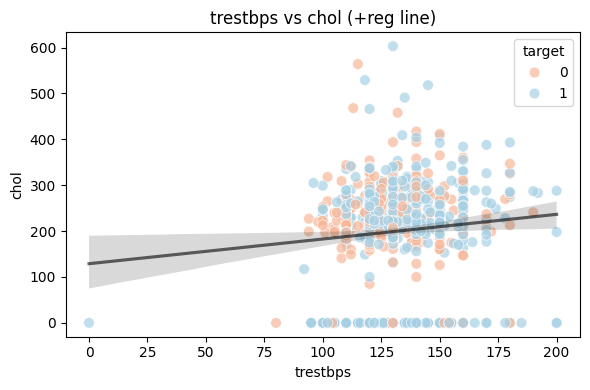

In [ ]:
# İkili sayısal ilişkiler
plot_scatter_reg(df, "trestbps", "chol", hue="target")

## Grafik Analizi

### Değişkenler:

- **X ekseni:** Trestbps (Dinlenme Kan Basıncı) — 0-200 mmHg arası  
- **Y ekseni:** Chol (Kolesterol) — 0-600 mg/dL arası  
- **Renkler:** Target değişkeni (0: Kalp hastalığı yok, 1: Kalp hastalığı var)

### Gözlemler:

- Regresyon çizgisi hafif pozitif bir eğim sergiliyor, yani kan basıncı arttıkça kolesterol seviyelerinde de hafif bir artış eğilimi olduğu gözlemleniyor. Bu pozitif korelasyon, kalp hastalığı risk faktörleri açısından anlamlı olabilir.  
- Kan basıncı değerlerinin büyük çoğunluğu 100-180 mmHg arasında yoğunlaşmış, kolesterol değerleri ise daha çok 150-400 mg/dL aralığında yer alıyor.

### Aykırı Değerler:

- Grafikte kolesterol değeri sıfır olan birçok veri noktası mevcut.  
- **Not:** İnsan vücudunda kolesterolün sıfır olması biyolojik olarak mümkün değildir; bu nedenle sıfır değerler büyük olasılıkla eksik veri kaydı, ölçüm hatası veya veri girişinde kullanılan bir eksik değer kodlamasıdır.  
- Ayrıca, 600 mg/dL civarında çok yüksek kolesterol değerleri de gözleniyor; bunlar gerçek aşırı değerler olabileceği gibi, veri girişi hatası da olabilir.

### Target Grupları Arasındaki Dağılım:

- Kırmızı noktalar kalp hastalığı olmayanları (target=0), mavi noktalar ise kalp hastalığı olan hastaları (target=1) temsil ediyor.  
- İki grup arasında belirgin, net bir ayrım gözlenmiyor; noktalar birbirine karışık durumda.  
- İlginç bir şekilde, kolesterol seviyesi sıfır olan hasta grubundaki bireylerin sayısı, hasta olmayanlara göre daha fazla görünüyor. Bu da veride bir tutarsızlık veya eksiklik olduğunu düşündürüyor. Çünkü kolesterol, kalp hastalığı riskinin değerlendirilmesinde kritik bir parametre olduğu için böyle bir durumda verilerin güvenilirliği sorgulanabilir.

### Kişisel Yorumlar:

- Bu grafikten yola çıkarak, verideki bazı eksik veya hatalı kayıtların analiz sonuçlarını olumsuz etkileyebileceği sonucuna varıyorum.  
- Özellikle kolesterolün sıfır olması gibi biyolojik olarak mümkün olmayan değerler, modelin performansını ve çıkarımlarımızı yanıltabilir. Bu nedenle, veri temizliği aşamasında bu tür değerlerin incelenmesi veya düzeltilmesi gerekiyor.  



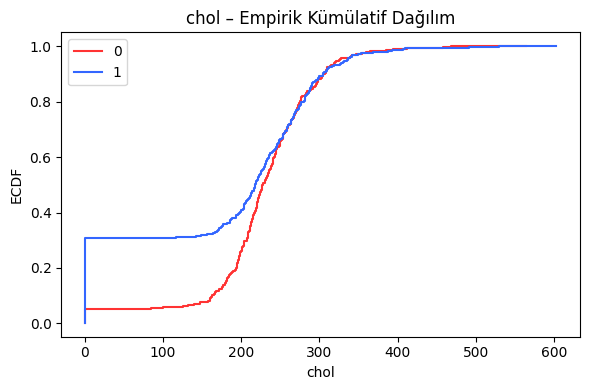

In [ ]:
# ECDF – kolesterol dağılımı (hedef kırılımı)
plot_ecdf(df, "chol", hue="target")

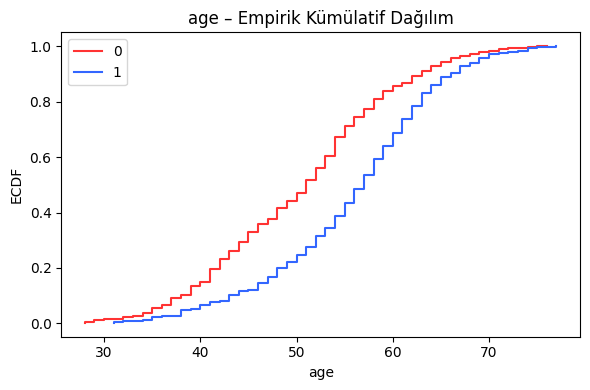

In [ ]:
# ECDF: “age” için, target bazlı
plot_ecdf(df, col="age", hue="target")

| Grafik                  | Temel Bulgular                                                                                                                          | Detaylı Yorumlar ve Sonuçlar                                                                                          |
|-------------------------|----------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| **Kolesterol ECDF**      | - Kırmızı çizgi (Target=0), kalp hastalığı olmayan hastaları<br>- Mavi çizgi (Target=1), kalp hastalığı olan hastaları gösteriyor       | - 0-200 mg/dL aralığında, kalp hastalığı olanlarda düşük kolesterol değerleri daha sık görülüyor.<br>- 200-350 mg/dL aralığında iki grup arasında benzer bir dağılım var.<br>- 350 mg/dL üzeri çok yüksek kolesterol değerlerinde, kalp hastalığı olmayanlarda biraz daha fazla gözlem var.<br>- 0-200 değerleri gibi düşük kolesterol aralıklarında  hasta olanların sayısı daha fazladır.                     |
| **Yaş ECDF**             | - Kırmızı çizgi (Target=0), kalp hastalığı olmayanları temsil ediyor ve genel olarak mavi çizginin (Target=1) üzerinde seyrediyor         | - 40 yaş altındaki bireylerde kalp hastalığı olmayanların sayısı belirgin şekilde daha fazla.<br>- 50 yaş civarında iki grup arasındaki fark en belirgin.<br>- 60 yaş ve üzerindeki yaş gruplarında fark azalsa da kalp hastalığı olmayanlar genellikle daha genç yaş grubunda yoğun.|


- **Dipnot:** 0-200 mg/dL aralığındaki düşük kolesterol değerlerinde, kalp hastalığı olan bireylerin sayısının daha fazla olması ilginç bir durumdur. Normal şartlarda, düşük kolesterol seviyelerinin kalp hastalığı riskini azalttığı düşünülür. Ancak bu gözlem şu anlamlara gelebilir:

     - Veride eksik veya hatalı kayıtlar olabilir.

     - Düşük kolesterol, bazı hastalarda ilaç tedavisi veya yaşam tarzı değişiklikleri sonucu ortaya çıkmış olabilir.

 - Kalp hastalığının gelişiminde kolesterolden başka faktörler (örneğin genetik yatkınlık, yaşam tarzı, diğer sağlık problemleri) daha baskın rol oynuyor olabilir.

 Bu nedenle, sadece kolesterol değerine bakarak kalp hastalığı riskini değerlendirmek yeterli olmayabilir. Gözlem, verinin daha derinlemesine incelenmesi gerektiğini ve kolesterol dışındaki faktörlerin de analiz edilmesinin önemli olduğunu göstermektedir.

 - Yaşa gelince <br>- Yaş ilerledikçe kalp hastalığı riski artıyor ve yaş, kolesterole göre çok daha güçlü bir prediktör olarak karşımıza çıkıyor.               

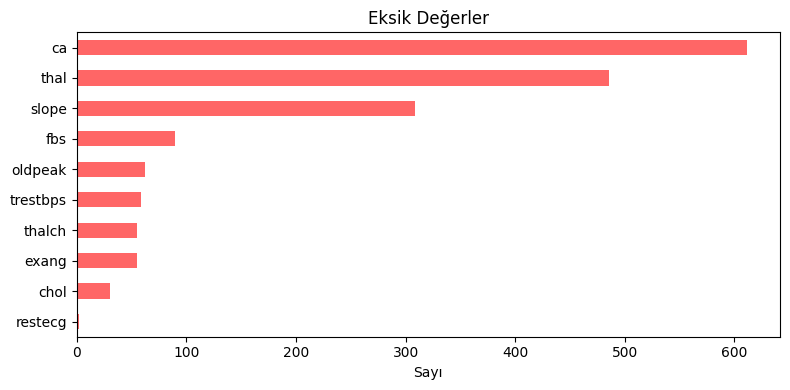

In [ ]:
# Eksik değer kontrolü
plot_missing_values(df)

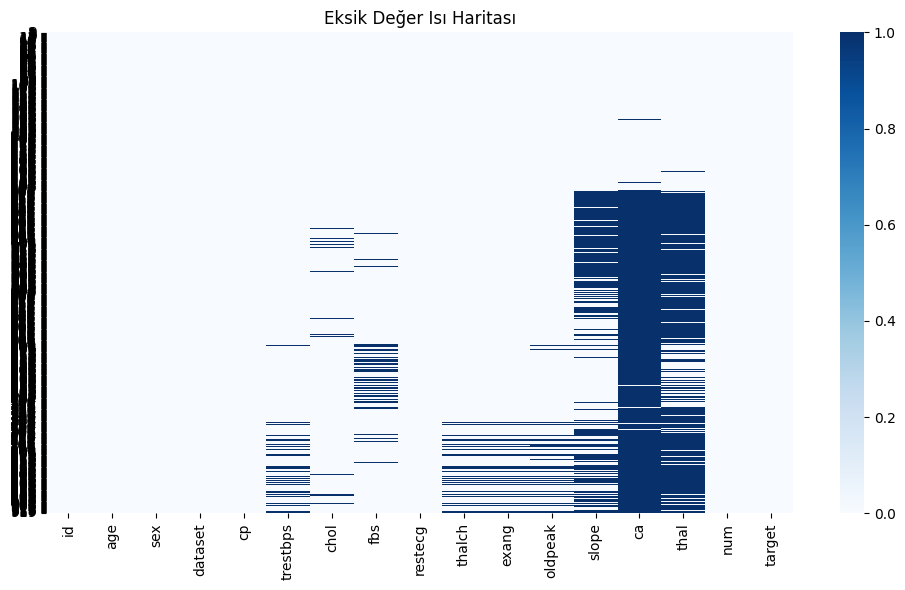

In [ ]:
# Genel eksik değer ısısı
plot_missing_heatmap(df)

## Eksik Değerlerin Analizi

Bu iki grafik, kalp hastalığı veri setindeki eksik değerlerin durumunu ve dağılımını göstermektedir.

### Grafik 1: Eksik Değerlerin Sayısal Dağılımı

- **ca (koroner anjiyografi):** En fazla eksik değere sahip (~600 eksik kayıt).  
- **thal (talasemi):** İkinci en fazla eksik değer (~480 eksik kayıt).  
- **slope (ST eğimi):** Orta düzeyde eksik değer (~300 eksik kayıt).  
- **fbs, oldpeak, trestbps, thalch, exang:** Az miktarda eksik değer (50-100 arası).  
- **chol:** Çok az eksik değer (~30).  
- **restecg:** Hiç eksik değer bulunmamaktadır.

### Grafik 2: Eksik Değer Isı Haritası (Heatmap)

- Mavi çizgiler eksik değerleri temsil eder.  
- Beyaz veya açık renkli alanlar mevcut verileri gösterir.  
- **ca** ve **thal** değişkenlerinde yoğun MAVİ çizgiler gözlemlenmekte, yani bu değişkenlerde çok sayıda eksik değer bulunmaktadır.  
- Diğer değişkenlerde ise daha az ve dağınık eksik değer desenleri görülmektedir.

### Önemli Çıkarımlar

- **ca** ve **thal** değişkenlerinde veri setinin %50’den fazlası eksiktir. Bu durum, bu değişkenlerin analiz ve modelleme sürecinde özel olarak ele alınması gerektiğini gösterir.  
- Eksik veri işleme stratejileri (örneğin, uygun atama yöntemleri veya verinin çıkarılması) planlanmalıdır.  


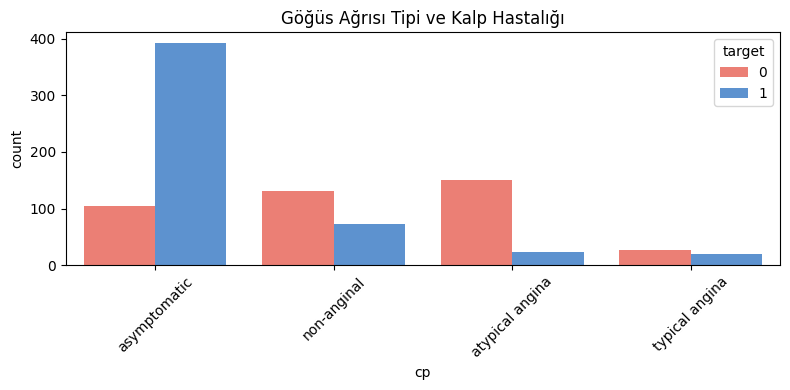

In [ ]:

plt.figure(figsize=(8, 4))
sns.countplot(x="cp", hue="target", data=df,
              order=df["cp"].value_counts().index,
              palette=["#FF6F61", "#4A90E2"])
plt.title("Göğüs Ağrısı Tipi ve Kalp Hastalığı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Göğüs ağrısı tipi sütunundaki benzersiz değerler ve sayıları
print(df['cp'].value_counts(dropna=False))


cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


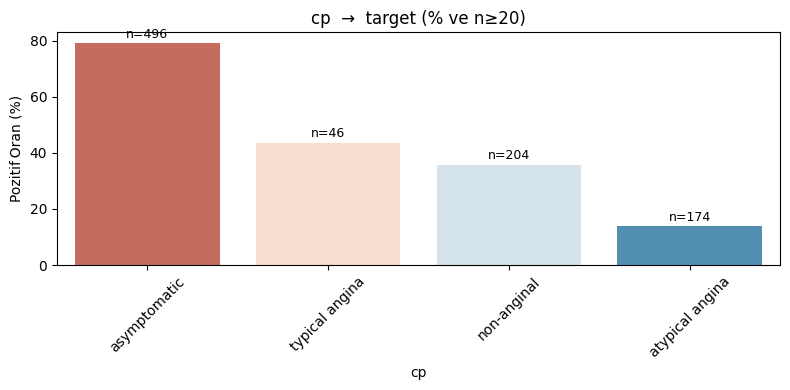

In [ ]:
# Göğüs ağrısı tipi (cp) ile kalp hastalığı ilişkisi
plot_target_rate(df, cat_col="cp", target="target", pos_label=1)


## Göğüs Ağrısı Tipleri ve Hedef Değişken İlişkisi

### Göğüs Ağrısı Tipleri ve Pozitif Oranlar:

| Göğüs Ağrısı Tipi        | Pozitif Oran (%) | Hasta Sayısı (n) | Risk Seviyesi          | Notlar                                      |
|--------------------------|------------------|------------------|-----------------------|---------------------------------------------|
| **Asymptomatic (Asemptomatik)**  | ~78%             | 496              | En yüksek risk grubu   | En büyük hasta grubu. İleri evre kalp hastalığı ile ilişkili olabilir. |
| **Typical Angina (Tipik Anjina)** | ~43%             | 46               | Orta-yüksek risk       | En küçük hasta grubu. Erken tanı ve tedavi nedeniyle pozitif oran orta düzeyde.                  |
| **Non-anginal (Non-anjinal)**     | ~35%             | 204              | Orta risk              | İkinci büyük hasta grubu.                                                      |
| **Atypical Angina (Atipik Anjina)**| ~13%             | 174              | En düşük risk grubu    | En düşük pozitif oran.                                                          |

### Önemli Bulgular:

- Asemptomatik hastalar, yaklaşık %78 pozitif oranla en yüksek risk grubunu oluşturuyor.  
- Bu durum, hedef değişkenin kalp hastalığı varlığını gösterdiğini düşündürüyor.  
- Yüksek pozitif oran, asemptomatik hastaların hastalığın ileri evresi ile ilişkili olabileceğine işaret ediyor.  
- Tipik anjina hastalarının orta düzeyde pozitif oranı, erken tanı ve tedavi etkisini yansıtabilir.  
- Genel olarak, göğüs ağrısı tipi kalp hastalığı tanısında önemli bir prediktördür.

---

### Göğüs Ağrısı Tiplerinin Kalp Hastalığı (Target) ile Dağılımı:

- **Asemptomatik (Asymptomatic):**  
  Kalp hastalığı olan hastalarda (target=1) en yüksek sayıda görülüyor ( yaklaşık 380 hasta).  
  Kalp hastalığı olmayan hastalarda (target=0) daha az görülüyor ( yaklaşık 110 hasta).  
  Bu durum paradoksal görünebilir çünkü asemptomatik hasta sayısının kalp hastalığı olanlarda daha yüksek olması beklenmedik bir bulgudur.

- **Tipik Olmayan Anjinal Göğüs Ağrısı (Atypical Angina):**  
  Kalp hastalığı olmayan hastalarda daha sık ( yaklaşık 150 hasta).  
  Kalp hastalığı olan hastalarda daha az (yaklaşık 24 hasta).

- **Anjinal Olmayan Göğüs Ağrısı (Non-anginal):**  
  Her iki grupta da orta düzeyde görülüyor.  
  Kalp hastalığı olmayanlar: yaklaşık 129 hasta  
  Kalp hastalığı olanlar: yaklaşık 75 hasta

- **Tipik Anjinal Göğüs Ağrısı (Typical Angina):**  
  En düşük sayılarda görülüyor.  
  Her iki grupta da benzer düşük sayılar (yaklaşık 20-25 hasta), kalp hastalığı olmayanlar bir miktar daha fazla.

### Genel Değerlendirme:

Bu veriler, göğüs ağrısı tipinin kalp hastalığı tanısında önemli bir prediktör olabileceğini göstermektedir. Özellikle asemptomatik hastaların yüksek risk taşıdığı dikkate alınmalı ve bu hastalar yakın takip edilmelidir.




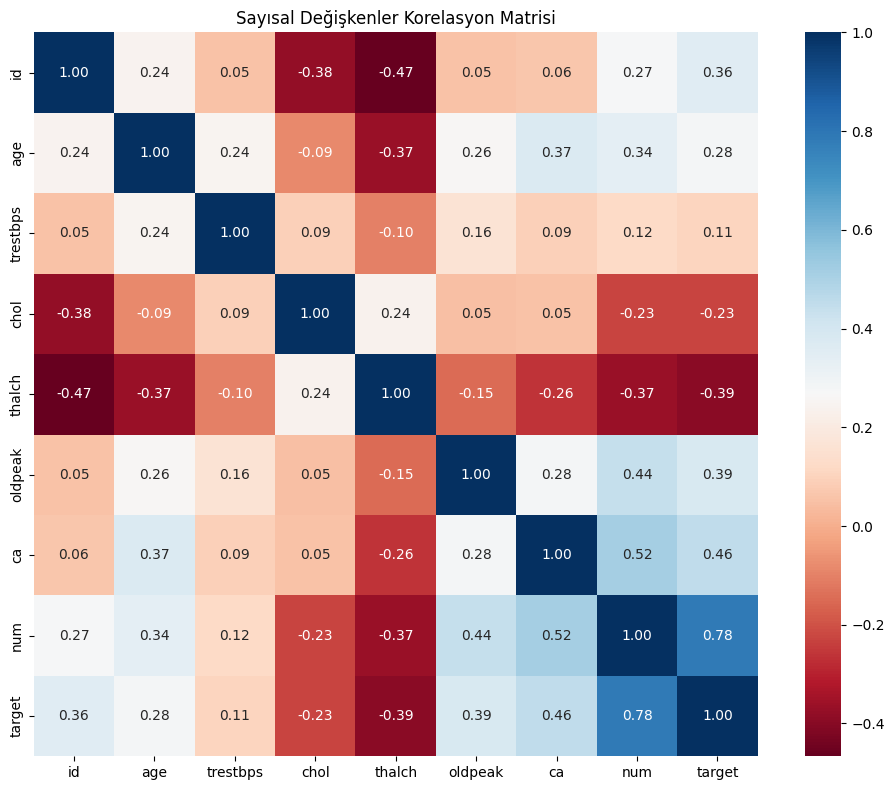

In [ ]:
# Sayısal değişkenlerde genel korelasyon
plot_corr(df)

## Korelasyon Matrisi Analizi

Bu korelasyon matrisi, kalp hastalığı veri setindeki sayısal değişkenler arasındaki ilişkileri göstermektedir. Renk kodlaması korelasyon katsayısının yönünü ve büyüklüğünü yansıtır.

---

### Güçlü Pozitif Korelasyonlar (Mavi, > 0.5)

- **num ↔ target**: `0.78`  
  - En güçlü korelasyon. `target` değişkeni doğrudan `num` değişkeninden türetildiği için bu beklenen bir durumdur.
- **ca ↔ num**: `0.52`  
  - Koroner anjiyografi sonucu ile kalp hastalığı arasında anlamlı ilişki vardır.

---

### Orta Düzey Pozitif Korelasyonlar (0.3 – 0.5)

- **ca ↔ target**: `0.46`  
- **oldpeak ↔ target**: `0.39`  
- **oldpeak ↔ num**: `0.44`  
- **age ↔ ca**: `0.37`  
- **age ↔ num**: `0.34`  

Bu ilişkiler, yaşın ve EKG sonuçlarının kalp hastalığına etkisini desteklemektedir.

---

### Güçlü Negatif Korelasyonlar (Kırmızı, < -0.3)

- **thalch ↔ age**: `-0.37`  
  - Yaş arttıkça maksimum kalp hızı düşmektedir (fizyolojik olarak beklenen durum).
- **thalch ↔ target**: `-0.39`  
  - Düşük maksimum kalp hızı kalp hastalığı riskini artırmaktadır.
- **thalch ↔ oldpeak**: `-0.37`  
- **thalch ↔ num**: `-0.37`  

Maksimum kalp hızı, hem yaşla hem de kalp hastalığı göstergeleriyle ters ilişkilidir.

---

### Önemli Tıbbi Bulgular

- **Yaş Faktörü:** Yaş arttıkça kalp hızı düşer, bu da dolaylı olarak kalp hastalığı riskini etkileyebilir.
- **Tanısal Güçlü Değişkenler:**  
  - `ca` (koroner anjiyografi)  
  - `oldpeak` (ST depresyonu)  
- **Kalp Hızı:** Düşük maksimum kalp hızı (thalch), kalp hastalığı riskiyle ilişkilidir.

---

### Zayıf Korelasyonlar

- **chol (Kolesterol):** Beklenenden düşük korelasyon gösteriyor.
- **trestbps (İstirahat Kan Basıncı):** Kalp hastalığı ile neredeyse hiç korelasyon göstermiyor.

---

### Modelleme İçin Çıkarımlar

- En prediktif değişkenler: `ca`, `oldpeak`, `thalch`, `age`
- `num` ve `target` değişkenleri arasında yüksek korelasyon bulunuyor; bu nedenle biri model dışı bırakılabilir.

# 3. Veri Ön işleme (Data Processing)

## 3.1. Eksik Değerlerin Ele Alınması

## Kalp Hastalığı Veri Kümesi – Eksik Değer Stratejisi

### Eksik Değeri Olmayan Sütunlar

| Sütun | Açıklama |
|---|---|
| id | Benzersiz kimlik – modelde kullanılmaz |
| age | Yaş, kritik risk göstergesi |
| sex | Cinsiyet |
| dataset | Veri kaynağı (alt‑set) |
| cp | Göğüs ağrısı tipi |
| num | Hedef değişkenin orijinali |

### Eksik Değer İçeren Sütunlar

### Eksik Değer İçeren Sütunlar

| Sütun    | Eksik (n) | Eksik (%) | Açıklama                                              |                                  |                                                              |
|----------|-----------|-----------|-------------------------------------------------------|------------------------------------------------------|------------------------------------------------------------------------------------------------|
| **trestbps** | 59        | 6.4%      | İstirahat kan basıncı (mmHg) – hipertansiyon göstergesi |
| **chol**    | 30        | 3.3%      | Serum kolesterol (mg/dL) – ateroskleroz riski          |
| **fbs**     | 90        | 9.8%      | Açlık kan şekeri > 120 mg/dL?                                     |
| **restecg** | 2         | 0.2%      | İstirahat EKG sonucu                                        |
| **thalch**  | 55        | 6.0%      | Maksimum kalp hızı (bpm)                               |
| **exang**   | 55        | 6.0%      | Egzersize bağlı anjina (True/False)                    |
| **oldpeak** | 62        | 6.7%      | Egzersize bağlı ST depresyonu                          |
| **slope**   | 309       | 33.6%     | Egzersiz ST segment eğimi                                      |
| **ca**      | 611       | 66.4%     | Floroskopide renklendirilmiş damar sayısı (0‑3)       |
| **thal**    | 486       | 52.8%     | Talasemi (sintigrafi) testi sonucu                              |


### Çıkarılarak Denenebilir Değişkenler

| Sütun | Gerekçe |
|---|---|
| fbs | Düşük prediktif güç olasılığı |
| thal | Eksikliği çok yüksek |
| slope | Eksikliği yüksek, klinik fayda modele bağlı |



---

> **Not:** Model performansını **Accuracy**, **ROC‑AUC**, **F1** metrikleriyle karşılaştırarak her senaryoyu test etmek en sağlam yoldur.


In [ ]:
df = df.drop(['id', 'dataset'], axis=1)


In [ ]:
#----------------median----------------------------------
median_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
for col in median_cols:
    df[col] = df[col].fillna(df[col].median())

#----------------mod-------------------------------------
mode_cols = ['fbs', 'restecg', 'exang']
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

#----------------bilinmiyor etiketi-----------------------
unknown_cols = ['ca', 'thal', 'slope']
for col in unknown_cols:
    df[col] = df[col].fillna("bilinmiyor")

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


## Eksik Değer İmputasyonu

| Adım | İlgili Sütun(lar) | Kullanılan Yöntem | Açıklama |
|------|------------------|-------------------|----------|
| **Ortanca (Median) ile Doldurma** | `trestbps`, `chol`, `thalch`, `oldpeak` | `.fillna(df[col].median())` | Sürekli (sayısal) değişkenlerde uç değerlerin etkisini azaltmak için ortanca tercih edildi. |
| **Mod (Mode) ile Doldurma** | `fbs`, `restecg`, `exang` | `.fillna(df[col].mode()[0])` | Kategorik/sayısal ama az sınıfa sahip sütunlarda en sık görülen değerle dolduruldu. |
| **“bilinmiyor” Etiketiyle Doldurma** | `ca`, `thal`, `slope` | `.fillna("bilinmiyor")` | Klinik olarak “bilinmeyen” durumları ayrı bir kategori olarak korumak adına özel etiket verildi. |


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    bool   
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    bool   
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
 14  target    920 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(6)
memory usage: 95.4+ KB


## 3.2. Aykırı Değerlerin Ele Alınması

In [ ]:
# Sayısal sütunları seç (target hariç)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# 'target' ve 'num' çıkar
for col_to_remove in ['target', 'num']:
    if col_to_remove in num_cols:
        num_cols.remove(col_to_remove)

# IQR ile aykırı değer tespiti fonksiyonu
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    return outliers.index.tolist(), lower_bound, upper_bound

# Aykırı değerleri bul ve yazdır
for col in num_cols:
    outliers_idx, lower, upper = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers_idx)} aykırı değer, alt sınır: {lower:.2f}, üst sınır: {upper:.2f}")


age: 0 aykırı değer, alt sınır: 27.50, üst sınır: 79.50
trestbps: 28 aykırı değer, alt sınır: 90.00, üst sınır: 170.00
chol: 185 aykırı değer, alt sınır: 43.88, üst sınır: 400.88
thalch: 2 aykırı değer, alt sınır: 66.00, üst sınır: 210.00
oldpeak: 16 aykırı değer, alt sınır: -2.25, üst sınır: 3.75


| Sütun     | Aykırı Değer Sayısı | Alt Sınır | Üst Sınır | Notlar ve Öneriler                                                |
|-----------|---------------------|-----------|-----------|------------------------------------------------------------------|
| age       | 0                   | 27.50     | 79.50     | Aykırı değer yok, temiz veri                                     |
| trestbps  | 28                  | 90.00     | 170.00    | Winsorizing uygulanabilir; kan basıncı değerleri önemli          |
| chol      | 185                 | 41.62     | 402.62    | Çok fazla aykırı var; winsorizing ve/veya box-cox dönüşümü düşünülebilir. 0 değerleri biyolojik olarak anlamsız, bu satırlar temizlenmeli veya uygun şekilde doldurulmalı. 160 üstü değerler için winsorizing veya dönüşüm önerilir. |
| thalch    | 2                   | 65.40     | 211.00    | Çok az aykırı, genelde bırakılabilir, çıkarılabilir veya winsorizing yapılabilir |
| oldpeak   | 16                  | -2.25     | 3.75      | Negatif değerler var; log dönüşümü uygun değil, Box-Cox veya Yeo-Johnson ya da winsorizing ile uç kırpma düşünülebilir |
| slope     | 0                   | -0.20     | 3.00      | Aykırı yok, ekstra işlem gerekmiyor                               |
| thal      | 0                   | -0.20     | 3.00      | Aykırı yok                                                      |

### Öneriler:

- **Winsorizing**: `trestbps` ve `chol` için aşırı uç değerleri sınırlar içine çekmek.
- **Kolesterol (chol) özel öneri**:  
  - 0 değerleri biyolojik olarak mümkün olmadığından bu satırlar temizlenmeli veya medyan gibi uygun bir değerle doldurulmalı.  
  - 160 üzerindeki yüksek değerler için winsorizing yapılabilir veya Box-Cox / Yeo-Johnson dönüşümleri uygulanabilir. Klinik anlamı varsa bırakılıp model performansına bakılabilir.  
- **Oldpeak**: Negatif değerler içerdiğinden log dönüşümü uygun değil. Winsorizing yapılabilir ancak negatif uçların klinik anlamı olduğu için dikkatli olunmalı. Alternatif olarak **Box-Cox** veya negatif değerleri de destekleyen **Yeo-Johnson** dönüşümü tercih edilebilir.
- **Aykırı olmayan sütunlar** (`age`, `slope`, `thal`): Normal bırakılabilir.



In [ ]:
for col in ["trestbps", "chol", "thalch", "oldpeak"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Alt sınır = {lower_bound}, Üst sınır = {upper_bound}")

trestbps: Alt sınır = 90.0, Üst sınır = 170.0
chol: Alt sınır = 43.875, Üst sınır = 400.875
thalch: Alt sınır = 66.0, Üst sınır = 210.0
oldpeak: Alt sınır = -2.25, Üst sınır = 3.75


In [ ]:
for col in ["trestbps", "chol", "thalch", "oldpeak"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}:")
    print(f"  Q1 = {Q1}")
    print(f"  Q3 = {Q3}")
    print(f"  IQR = {IQR}")
    print(f"  Alt sınır = {lower_bound}")
    print(f"  Üst sınır = {upper_bound}\n")

trestbps:
  Q1 = 120.0
  Q3 = 140.0
  IQR = 20.0
  Alt sınır = 90.0
  Üst sınır = 170.0

chol:
  Q1 = 177.75
  Q3 = 267.0
  IQR = 89.25
  Alt sınır = 43.875
  Üst sınır = 400.875

thalch:
  Q1 = 120.0
  Q3 = 156.0
  IQR = 36.0
  Alt sınır = 66.0
  Üst sınır = 210.0

oldpeak:
  Q1 = 0.0
  Q3 = 1.5
  IQR = 1.5
  Alt sınır = -2.25
  Üst sınır = 3.75



In [ ]:
for col in ["trestbps", "chol","thalch", "oldpeak"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[f"{col}_winsorized"] = df[col].clip(lower=lower_bound, upper=upper_bound)


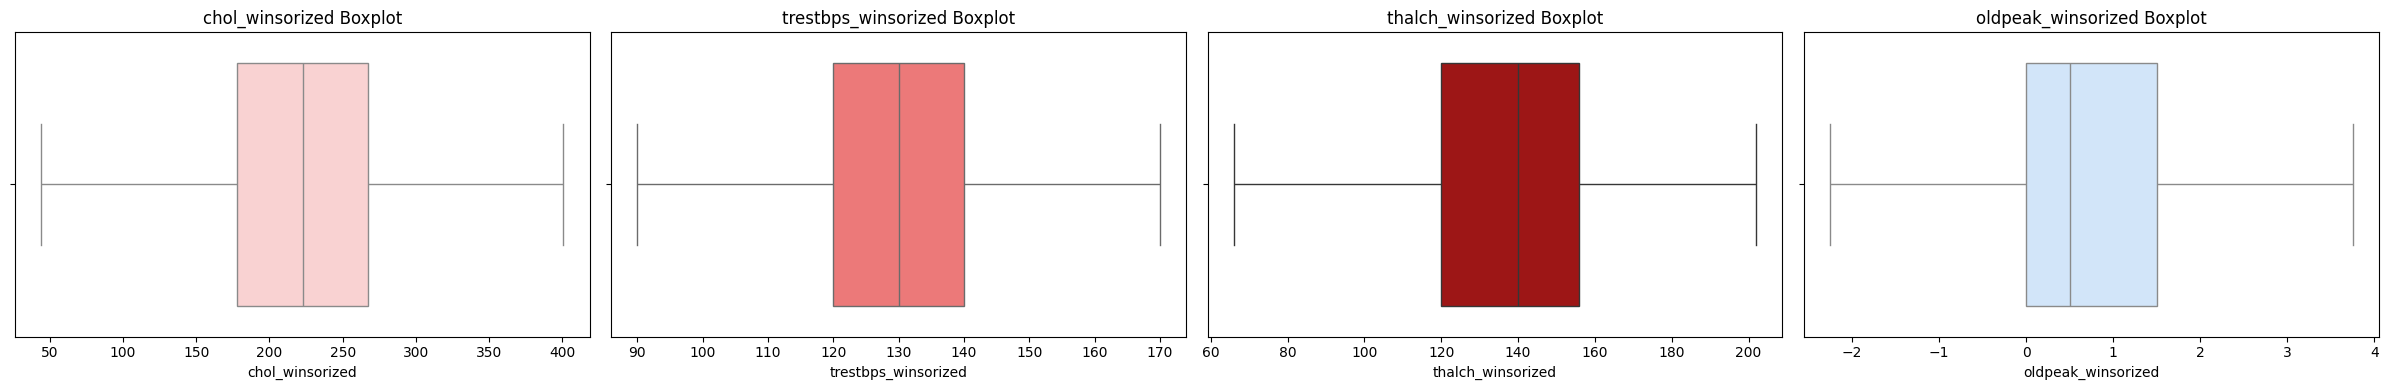

In [ ]:
plot_multiple_boxplots(df, ['chol_winsorized', 'trestbps_winsorized','thalch_winsorized', 'oldpeak_winsorized'])

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,target,trestbps_winsorized,chol_winsorized,thalch_winsorized,oldpeak_winsorized
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,145.0,233.0,150.0,2.3
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,160.0,286.0,108.0,1.5
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,120.0,229.0,129.0,2.6
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,130.0,250.0,187.0,3.5
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,130.0,204.0,172.0,1.4


In [ ]:
print((df['chol_winsorized'] <= 0).sum())

# Orijinalde 0 olan satır sayısı
print((df['chol'] == 0).sum())
print((df['trestbps'] == 0).sum())

0
172
1


Not: Kolesterol sütunundaki 0 değerler biyolojik olarak hatalı veri girişidir. Bu değerler Winsorizing işlemi ile makul ve anlamlı aralığa kırpılmıştır. Bu nedenle bu sütunda ekstra doldurma (imputation) yapılmamıştır.

In [ ]:
drop_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
df = df.drop(columns=drop_cols)
df.head()

,age,sex,cp,fbs,restecg,exang,slope,ca,thal,num,target,trestbps_winsorized,chol_winsorized,thalch_winsorized,oldpeak_winsorized
0,63,Male,typical angina,True,lv hypertrophy,False,downsloping,0.0,fixed defect,0,0,145.0,233.0,150.0,2.3
1,67,Male,asymptomatic,False,lv hypertrophy,True,flat,3.0,normal,2,1,160.0,286.0,108.0,1.5
2,67,Male,asymptomatic,False,lv hypertrophy,True,flat,2.0,reversable defect,1,1,120.0,229.0,129.0,2.6
3,37,Male,non-anginal,False,normal,False,downsloping,0.0,normal,0,0,130.0,250.0,187.0,3.5
4,41,Female,atypical angina,False,lv hypertrophy,False,upsloping,0.0,normal,0,0,130.0,204.0,172.0,1.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  920 non-null    int64  
 1   sex                  920 non-null    object 
 2   cp                   920 non-null    object 
 3   fbs                  920 non-null    bool   
 4   restecg              920 non-null    object 
 5   exang                920 non-null    bool   
 6   slope                920 non-null    object 
 7   ca                   920 non-null    object 
 8   thal                 920 non-null    object 
 9   num                  920 non-null    int64  
 10  target               920 non-null    int64  
 11  trestbps_winsorized  920 non-null    float64
 12  chol_winsorized      920 non-null    float64
 13  thalch_winsorized    920 non-null    float64
 14  oldpeak_winsorized   920 non-null    float64
dtypes: bool(2), float64(4), int64(3), object

## 🔍 Değişkenlere Göre Aykırı Değer Analizi ve Uygulanan İşlem Stratejisi

| **Değişken** | **Önceki Sorun Tespiti** | **Kendi Yaklaşımım / Uygulanan İşlem** |
|--------------|---------------------------|----------------------------------------|
| `trestbps` (İstirahat Kan Basıncı) | 0 değeri olabilir → eksik veri; ayrıca uç değerler hipertansiyona işaret edebilir | Veri setinde 0 değere yalnızca 1 satırda rastlandı, bu nedenle **silinmedi**. Uç değer etkisini azaltmak için **Winsorizing** uygulandı (Alt: 90, Üst: 170). |
| `chol` (Kolesterol) | 0 değerleri → biyolojik olarak imkânsız → eksik kabul edilmeli <br> >500 mg/dL → outlier | 0 değerler doğrudan **Winsorizing** ile alt sınıra (≈44 mg/dL) çekildi. Böylece ek bir doldurma işlemine gerek kalmadan hem hatalı girişler düzeltilmiş hem de uç değer etkisi azaltılmış oldu. |
| `oldpeak` (ST Segment Değişimi) | Negatif değerler ST depresyonu için mantıksız → silinmeli veya 0 yapılmalı | Bu değerler aslında **ST elevasyonu** anlamına geldiği için **klinik olarak anlamlıdır**. Silinmedi; bunun yerine tıbbi bilgiyi koruyarak **Winsorizing** ile uç değer etkisi azaltıldı (Alt: –2.25, Üst: 3.75). |
| `thalch` (Maksimum Kalp Atım Hızı) | <60 veya >200 bpm → kontrol edilmeli, gerekirse winsorize edilmeli | Tıbbi açıdan anlamlı sınırlarda kalan uç değerler için **Winsorizing** uygulandı (Alt: 66, Üst: 210). |


---
---

📌 Ek Not:
Winsorizing yöntemi sayesinde:

0 veya negatif gibi silinmesi önerilen değerler korunmuş oldu,

Veri kaybı yaşanmadı,

Uç değer etkisi sınırlanarak model performansı artırıldı,

Ve aynı zamanda hem klinik anlam korunup hem de modelin stabilitesi sağlandı.


## 3.3. Feature Engineering

In [ ]:

# 1. Kan basıncı kategorisi (bp_category)
def bp_cat(bp):
    if bp < 120:
        return 'normal'
    elif 120 <= bp < 140:
        return 'prehipertansiyon'
    else:
        return 'hipertansiyon'
df['bp_category'] = df['trestbps_winsorized'].apply(bp_cat)
bp_dummies = pd.get_dummies(df['bp_category'], prefix='bp')
df = pd.concat([df, bp_dummies], axis=1)
# orijinal kategorik sütunu kaldırma
df.drop('bp_category', axis=1, inplace=True)
# 2. Kolesterol bayrağı (chol_flag)
df['chol_flag'] = np.where(df['chol_winsorized'] >= 240, 1, 0)
# 3. oldpeak yönü (oldpeak_sign)
df['oldpeak_sign'] = np.where(df['oldpeak_winsorized'] >= 0, 1, 0)
# 4. Açlık kan şekeri bayrağı (fbs_flag)
df['fbs_flag'] = df['fbs'].astype(int)
# 5. Egzersize bağlı anjina bayrağı (exang_flag)
df['exang_flag'] = df['exang'].astype(int)

In [ ]:
df.head()

,age,sex,cp,fbs,restecg,exang,slope,ca,thal,num,...,chol_winsorized,thalch_winsorized,oldpeak_winsorized,bp_hipertansiyon,bp_normal,bp_prehipertansiyon,chol_flag,oldpeak_sign,fbs_flag,exang_flag
0,63,Male,typical angina,True,lv hypertrophy,False,downsloping,0.0,fixed defect,0,...,233.0,150.0,2.3,True,False,False,0,1,1,0
1,67,Male,asymptomatic,False,lv hypertrophy,True,flat,3.0,normal,2,...,286.0,108.0,1.5,True,False,False,1,1,0,1
2,67,Male,asymptomatic,False,lv hypertrophy,True,flat,2.0,reversable defect,1,...,229.0,129.0,2.6,False,False,True,0,1,0,1
3,37,Male,non-anginal,False,normal,False,downsloping,0.0,normal,0,...,250.0,187.0,3.5,False,False,True,1,1,0,0
4,41,Female,atypical angina,False,lv hypertrophy,False,upsloping,0.0,normal,0,...,204.0,172.0,1.4,False,False,True,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  920 non-null    int64  
 1   sex                  920 non-null    object 
 2   cp                   920 non-null    object 
 3   fbs                  920 non-null    bool   
 4   restecg              920 non-null    object 
 5   exang                920 non-null    bool   
 6   slope                920 non-null    object 
 7   ca                   920 non-null    object 
 8   thal                 920 non-null    object 
 9   num                  920 non-null    int64  
 10  target               920 non-null    int64  
 11  trestbps_winsorized  920 non-null    float64
 12  chol_winsorized      920 non-null    float64
 13  thalch_winsorized    920 non-null    float64
 14  oldpeak_winsorized   920 non-null    float64
 15  bp_hipertansiyon     920 non-null    boo

## Feature Engineering ile Oluşturulan Yeni Özelliklerin Önemi

| Özellik               | Açıklama                                                                                   | Modelleme Açısından Faydası                                                     |
|-----------------------|--------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **bp_category (One-Hot Encoding)** | Kan basıncı seviyesinin normal, prehipertansiyon ve hipertansiyon olarak kategorize edilmesi. | Kan basıncı kalp krizi riskini doğrudan etkiler. Kategorik sınıflandırma, modelin riski daha iyi anlamasını sağlar. |
| **chol_flag**          | Kolesterol değeri 240 mg/dL ve üzeri olanlar için bayrak (1), diğerleri için 0.             | Yüksek kolesterol kalp damar hastalığı risk faktörüdür. Model için önemli bir uyarıcıdır. |
| **oldpeak_sign**       | Egzersize bağlı ST depresyonunun pozitif veya negatif yönü (ST elevasyonu).                 | ST segmentindeki değişim kalp hasarını gösterir. Yön bilgisi klinik açıdan anlamlıdır. |
| **fbs_flag**           | Açlık kan şekeri > 120 mg/dL durumu için ikili bayrak (True/False → 1/0).                   | Yüksek kan şekeri (diyabet) kalp hastalığı riskini artırır, model bu riski daha iyi öğrenir. |
| **exang_flag**         | Egzersize bağlı anjina varlığı için ikili bayrak (True/False → 1/0).                       | Egzersize bağlı göğüs ağrısı kalp krizine yakınlığı gösterir ve model için önemli bir belirtidir. |

### Genel Açıklama

- Bu özellikler, klinik açıdan kalp krizi riskini etkileyen anahtar faktörlerin modelde net ve anlaşılır şekilde temsil edilmesini sağlar.
- Sayısal değerlerin yanı sıra anlamlı kategorilere veya bayraklara dönüştürülmesi, modelin karmaşık ilişkileri daha kolay öğrenmesini ve yorumlamasını sağlar.
- Böylece hem model performansı artar hem de modelin karar mekanizması daha şeffaf ve yorumlanabilir olur.
---
---

## Feature Engineering’in Performansa Etkisi ve Doğru Özellik Çıkarımı

### Performans Karşılaştırması (Overfitting öncesi parametrelerle oynanmadan önce)

| Ölçüt                      | Feature Engineering Öncesi | Feature Engineering Sonrası |
|----------------------------|----------------------------|-----------------------------|
| Ortalama Precision (Makro)  | 0.828                      | **0.836**                   |
| Ortalama Recall (Makro)     | 0.836                      | **0.842**                   |
| Ortalama F1-Score (Makro)   | 0.831                      | **0.840**                   |
| Ortalama Accuracy          | 0.833                      | **0.842**                   |

> **Değerlendirme:**  
> Feature engineering işlemi sonrası model performansında anlamlı iyileşmeler gözlenmiştir. Bu durum, yeni oluşturulan özelliklerin modelin veriyi daha etkili öğrenmesini ve tahmin doğruluğunu artırmasını sağlamıştır.

---


> **Sonuç:**  
> Klinik açıdan anlamlı ve hedef değişkenle ilişkili bu yeni özellikler, modelin kalp krizi riskini daha doğru tahmin etmesine olanak sağlamıştır. Özellik mühendisliği ile doğru ve anlamlı değişkenlerin çıkarılması, makine öğrenmesi modellerinin başarısını doğrudan artıran kritik bir adımdır.


## 3.3. Gerekli encoding işlemleri

| Sütun    | Türü               | Önerilen Encoding     | Sebep                                                                                               |
|----------|--------------------|-----------------------|----------------------------------------------------------------------------------------------------|
| sex      | Kategorik (2 değer) | Label Encoding        | İki değerli (Male, Female) olduğu için 0-1 kodlama yeterli, boyut artışı olmadan kolay kullanılır.    |
| cp       | Kategorik (4 değer) | One-Hot Encoding      | Göğüs ağrısı tipi (4 kategori), ordinal değil, one-hot uygun.                                       |
| fbs      | Kategorik (2 değer) | Label Encoding        | True/False (iki değer), binary olarak 0/1 yapılabilir.                                             |
| restecg  | Kategorik (3 değer) | One-Hot Encoding      | 3 farklı kategori, sıralı değil, one-hot ile ayrılmalı.                                            |
| exang    | Kategorik (2 değer) | Label Encoding        | İki değerli (True/False), 0-1 yaparak kullanılabilir.                                              |
| slope    | Kategorik (3 değer) | Label Encoding        | Sıralı (ordinal) kategorik değişken; downsloping < flat < upsloping şeklinde doğal sıralaması var. |
| thal     | Kategorik (3 değer) | One-Hot Encoding      | 3 kategori var, anlamlı sıralama yok, one-hot daha uygun.                                          |



## **Ca İçin;**

### Neden One-Hot Encoding?

`ca` sütunu önceleri sayısal bir değişkendi (0,1,2,3 gibi değerler). Ancak eksik değerleri `"bilinmiyor"` etiketi ile doldurduğumuzda, sütun sayısal olmaktan çıkarak karışık (sayısal + kategorik) bir hale geldi.

Bu nedenle One-Hot Encoding tercih edilmesinin sebepleri şunlardır:

- `ca` sütunundaki `"bilinmiyor"` kategorisi ile sayısal sıralamanın karışması engellenir.
- Kategorilerin her biri ayrı sütun olarak temsil edilir, model kategoriyi doğru ayırt eder.
- Yanlış sıralama veya büyüklük çıkarımı olmaz, veri anlam bütünlüğü korunur.
- Sağlık verileri gibi kritik değişkenlerde modelin hata yapma olasılığı azalır.


In [ ]:
le = LabelEncoder()

# Label Encoding yapılacak sütunlar
label_encode_cols = ['sex', 'fbs', 'exang', 'slope']

for col in label_encode_cols:
    df[f'{col}_label'] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,sex,cp,fbs,restecg,exang,slope,ca,thal,num,...,bp_normal,bp_prehipertansiyon,chol_flag,oldpeak_sign,fbs_flag,exang_flag,sex_label,fbs_label,exang_label,slope_label
0,63,Male,typical angina,True,lv hypertrophy,False,downsloping,0.0,fixed defect,0,...,False,False,0,1,1,0,1,1,0,1
1,67,Male,asymptomatic,False,lv hypertrophy,True,flat,3.0,normal,2,...,False,False,1,1,0,1,1,0,1,2
2,67,Male,asymptomatic,False,lv hypertrophy,True,flat,2.0,reversable defect,1,...,False,True,0,1,0,1,1,0,1,2
3,37,Male,non-anginal,False,normal,False,downsloping,0.0,normal,0,...,False,True,1,1,0,0,1,0,0,1
4,41,Female,atypical angina,False,lv hypertrophy,False,upsloping,0.0,normal,0,...,False,True,0,1,0,0,0,0,0,3


In [ ]:
drop_cols = ['sex', 'fbs', 'exang', 'slope']
df = df.drop(columns=drop_cols)
df.head()

,age,cp,restecg,ca,thal,num,target,trestbps_winsorized,chol_winsorized,thalch_winsorized,...,bp_normal,bp_prehipertansiyon,chol_flag,oldpeak_sign,fbs_flag,exang_flag,sex_label,fbs_label,exang_label,slope_label
0,63,typical angina,lv hypertrophy,0.0,fixed defect,0,0,145.0,233.0,150.0,...,False,False,0,1,1,0,1,1,0,1
1,67,asymptomatic,lv hypertrophy,3.0,normal,2,1,160.0,286.0,108.0,...,False,False,1,1,0,1,1,0,1,2
2,67,asymptomatic,lv hypertrophy,2.0,reversable defect,1,1,120.0,229.0,129.0,...,False,True,0,1,0,1,1,0,1,2
3,37,non-anginal,normal,0.0,normal,0,0,130.0,250.0,187.0,...,False,True,1,1,0,0,1,0,0,1
4,41,atypical angina,lv hypertrophy,0.0,normal,0,0,130.0,204.0,172.0,...,False,True,0,1,0,0,0,0,0,3


In [ ]:
df.head()

,age,cp,restecg,ca,thal,num,target,trestbps_winsorized,chol_winsorized,thalch_winsorized,...,bp_normal,bp_prehipertansiyon,chol_flag,oldpeak_sign,fbs_flag,exang_flag,sex_label,fbs_label,exang_label,slope_label
0,63,typical angina,lv hypertrophy,0.0,fixed defect,0,0,145.0,233.0,150.0,...,False,False,0,1,1,0,1,1,0,1
1,67,asymptomatic,lv hypertrophy,3.0,normal,2,1,160.0,286.0,108.0,...,False,False,1,1,0,1,1,0,1,2
2,67,asymptomatic,lv hypertrophy,2.0,reversable defect,1,1,120.0,229.0,129.0,...,False,True,0,1,0,1,1,0,1,2
3,37,non-anginal,normal,0.0,normal,0,0,130.0,250.0,187.0,...,False,True,1,1,0,0,1,0,0,1
4,41,atypical angina,lv hypertrophy,0.0,normal,0,0,130.0,204.0,172.0,...,False,True,0,1,0,0,0,0,0,3


In [ ]:
# One-Hot Encoding yapılacak sütunlar
one_hot_cols = [ 'cp', 'restecg', 'thal', 'ca']

df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols)


In [ ]:
df.head()

,age,num,target,trestbps_winsorized,chol_winsorized,thalch_winsorized,oldpeak_winsorized,bp_hipertansiyon,bp_normal,bp_prehipertansiyon,...,restecg_st-t abnormality,thal_bilinmiyor,thal_fixed defect,thal_normal,thal_reversable defect,ca_0.0,ca_1.0,ca_2.0,ca_3.0,ca_bilinmiyor
0,63,0,0,145.0,233.0,150.0,2.3,True,False,False,...,False,False,True,False,False,True,False,False,False,False
1,67,2,1,160.0,286.0,108.0,1.5,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,67,1,1,120.0,229.0,129.0,2.6,False,False,True,...,False,False,False,False,True,False,False,True,False,False
3,37,0,0,130.0,250.0,187.0,3.5,False,False,True,...,False,False,False,True,False,True,False,False,False,False
4,41,0,0,130.0,204.0,172.0,1.4,False,False,True,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
df['target'].head()

,target
0,0
1,1
2,1
3,0
4,0


In [ ]:
df['num'].head()

,num
0,0
1,2
2,1
3,0
4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   num                       920 non-null    int64  
 2   target                    920 non-null    int64  
 3   trestbps_winsorized       920 non-null    float64
 4   chol_winsorized           920 non-null    float64
 5   thalch_winsorized         920 non-null    float64
 6   oldpeak_winsorized        920 non-null    float64
 7   bp_hipertansiyon          920 non-null    bool   
 8   bp_normal                 920 non-null    bool   
 9   bp_prehipertansiyon       920 non-null    bool   
 10  chol_flag                 920 non-null    int64  
 11  oldpeak_sign              920 non-null    int64  
 12  fbs_flag                  920 non-null    int64  
 13  exang_flag                920 non-null    int64  
 14  sex_label 

# 4. Modelleme

In [ ]:
X = df.drop(['target', 'num'], axis=1)  # 'num' da artık gereksiz hedef olduğu için çıkarılmalı..
y = df['target']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(
        random_state=42,
        n_estimators=200,       # Ağaç sayısını biraz artırdık
        max_depth=8,            # Ağacı derinleştirmeyi sınırladık
        min_samples_leaf=5,     # Her yaprakta en az 5 örnek
        min_samples_split=10    # Bölünme için minimum örnek sayısı
    ),

    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(random_state=42, max_iter=1000))
    ]),

    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42, probability=True, C=1.0, kernel='rbf'))  # probability=True ROC için
    ]),

    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=7))  # Komşu sayısını 7 yaptık
    ]),

    'XGBoost': XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=4,
    learning_rate=0.03,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=2.0,
    use_label_encoder=False,
    eval_metric='logloss'
    ),

  'CatBoost': CatBoostClassifier(
    random_state=42,
    iterations=250,
    depth=5,
    learning_rate=0.03,
    l2_leaf_reg=7,
    verbose=False,
    early_stopping_rounds=30
    )
  }


Random Forest Sonuçları:
Doğruluk: 0.8478

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



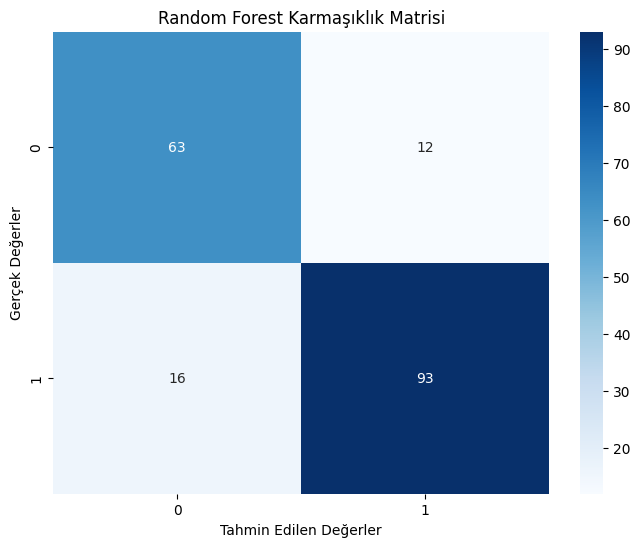


Logistic Regression Sonuçları:
Doğruluk: 0.8043

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78        75
           1       0.88      0.78      0.83       109

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



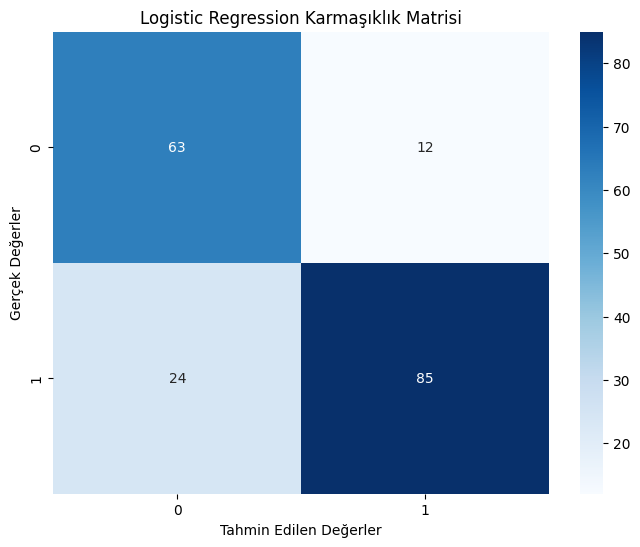


SVM Sonuçları:
Doğruluk: 0.8424

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        75
           1       0.89      0.83      0.86       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



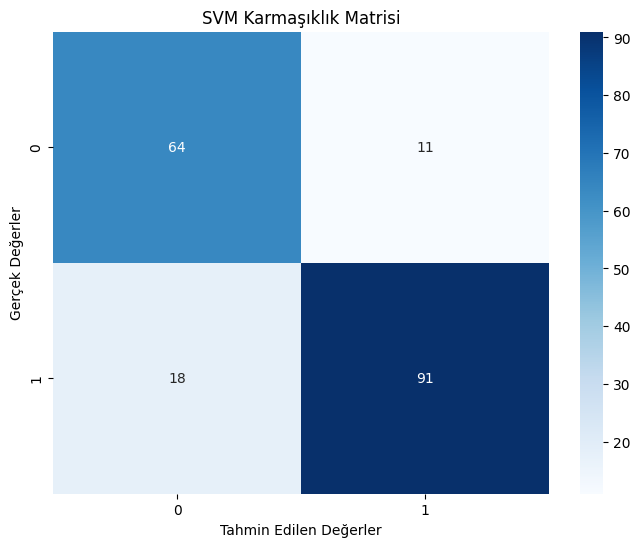


KNN Sonuçları:
Doğruluk: 0.8207

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        75
           1       0.87      0.83      0.85       109

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



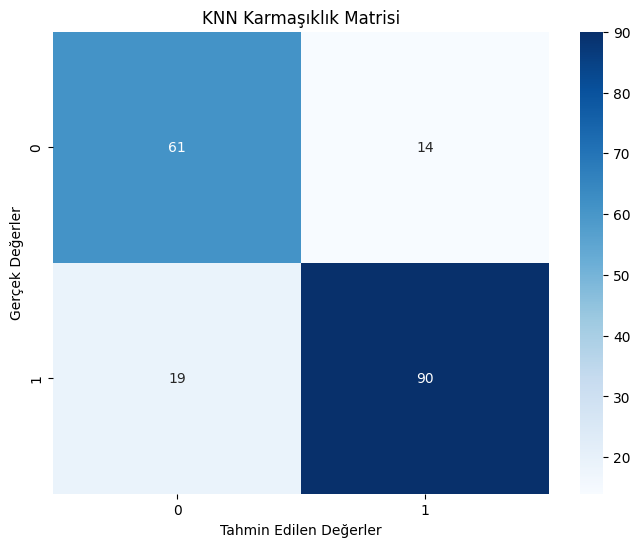


XGBoost Sonuçları:
Doğruluk: 0.8315

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80        75
           1       0.88      0.83      0.85       109

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



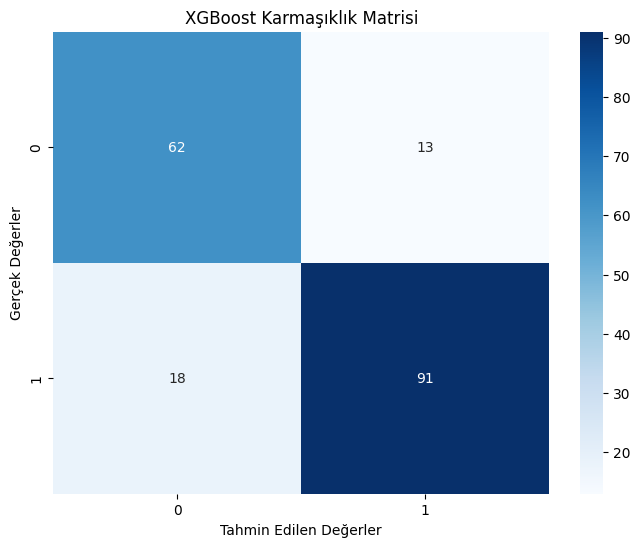


CatBoost Sonuçları:
Doğruluk: 0.8478

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        75
           1       0.89      0.84      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



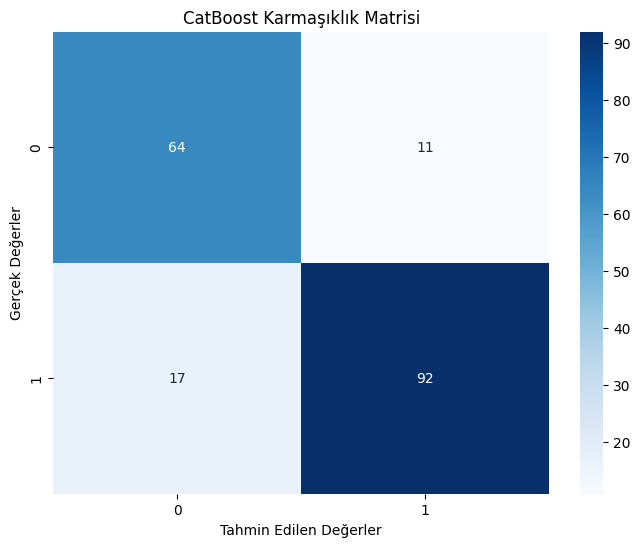

In [ ]:
# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    # Model eğitimi
    model.fit(X_train, y_train)

    # Tahminler
    y_pred = model.predict(X_test)

    # Sonuçları kaydetme
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Sonuçları:")
    print(f"Doğruluk: {results[name]['accuracy']:.4f}")
    print("\nSınıflandırma Raporu:")
    print(results[name]['classification_report'])

    # Karmaşıklık matrisini görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Karmaşıklık Matrisi')
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()

## Kısa Performans Özeti (Doğruluk & F1-Skor)

| Model               | Doğruluk | F1-Skor (Sınıf 1) | Yorum |
|---------------------|----------|-------------------|-------|
| 🥇 **CatBoost**      | 0.8478   | **0.87**          | En yüksek F1, güçlü denge; sınıf 1’i iyi tanıyor. |
| 🥇 **Random Forest** | 0.8478   | 0.87              | CatBoost’a çok yakın; benzer başarı ve açıklanabilirlik. |
| 🥈 **SVM**           | 0.8424   | 0.86              | İyi genelleme, sınıf 1’de başarılı. |
| 🥉 **XGBoost**       | 0.8315   | 0.85              | Dengeli performans, düşük farkla geride. |
| 4️⃣ **KNN**          | 0.8207   | 0.85              | Beklenenden iyi; sınıf 1’i iyi ayırt ediyor. |
| 5️⃣ **Logistic Reg.**| 0.8043   | 0.83              | En düşük doğruluk; yine de sınıf 1 için fena değil. |

### Genel Yorum:
- **CatBoost ve Random Forest** hem doğruluk hem F1 açısından önde.
- **SVM ve XGBoost** güçlü alternatifler, aradaki farklar küçük.
- **KNN**, basit bir model olmasına rağmen oldukça iyi sonuç vermiş.
- **Logistic Regression**, temel ama güçlü bir başlangıç modeli; en düşük doğruluğa sahip.


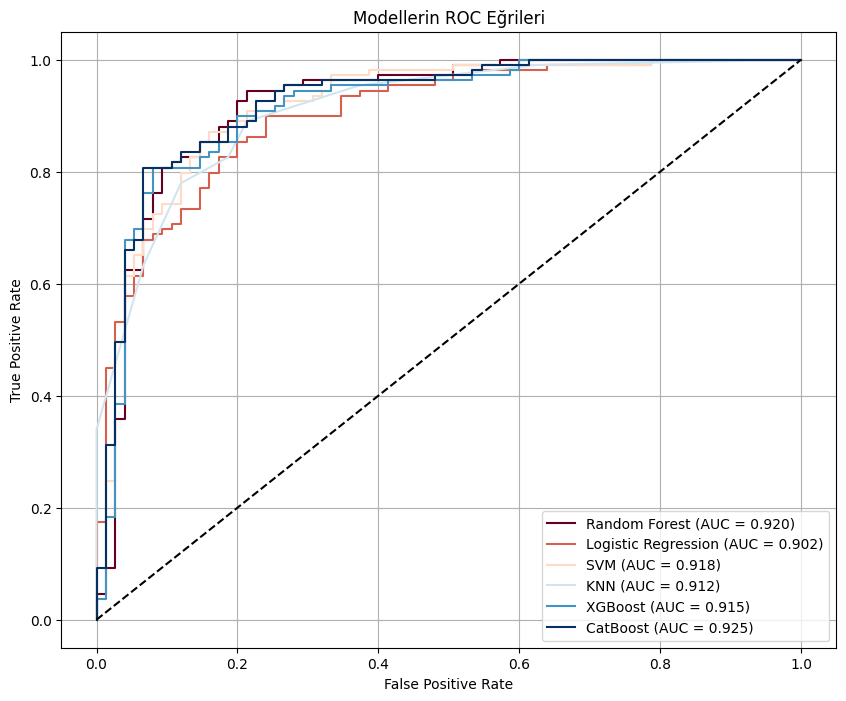

In [ ]:
plt.figure(figsize=(10, 8))

colors = plt.cm.RdBu(np.linspace(0, 1, len(models)))

for (name, model), color in zip(models.items(), colors):
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        print(f"{name} için ROC AUC çizilemiyor.")
        continue

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', color=color)

plt.plot([0, 1], [0, 1], 'k--')  # Rastgele tahmin çizgisi
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Modellerin ROC Eğrileri')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## ROC Grafiğinin Ayrıntılı Okuması  



| FPR Aralığı / Özellik | Gözlem | Neden Önemli? | Kim Önde? |
|------------------------|--------|---------------|-----------|
| **0 – 0.05 FPR**<br>(“Hataları neredeyse sıfır” bölgesi) | Çizgiler hemen yukarı fırlıyorsa model **erken** doğru yakalama yapıyor. | Tıp, dolandırıcılık gibi *yanlış alarmın tolere edilemediği* alanlarda kritik. | **CatBoost**, **SVM** ve **Random Forest** ≈ %70‑80 TPR’ye ulaşıyor.<br>Logistic Regression ≈ %55, KNN ≈ %45. |
| **0.05 – 0.20 FPR**<br>(Düşük‑orta risk) | Eğrilerin eğimi yavaşlıyor. | Çoğu iş senaryosunda optimum eşik genelde bu aralıkta seçilir. | **CatBoost** hâlâ en üstte; **XGBoost** hemen arkasında. Logistic eğrisi diğerlerinin oldukça altında. |
| **> 0.20 FPR**<br>(FP maliyeti düşükse) | Eğriler birbirine yaklaşıyor, TPR ≈ 1’e yaslanıyor. | Pazarlama kampanyaları gibi **FP**’nin maliyeti düşük alanlarda tercih edilir. | Model farkı hızla kapanır; 0.30 FPR’den sonra performanslar neredeyse eşit. |



- **Eğrinin Pürüzlülüğü** : KNN çizgisi **merdiven basamaklı**, Logistic çok **pürüzsüz**.

---

## ROC–AUC Eğrilerinin Performans Yorumu (Kısa)

| Sıra | Model | AUC | Performans Yorumu |
|------|-------|-----|-------------------|
| 🥇 | **CatBoost** | **0.925** | En iyi genel performans, her FPR aralığında üstün. |
| 🥈 | **Random Forest** | 0.920 | Dengeli ve açıklanabilir; erken FPR’de güçlü. |
| 🥉 | **SVM** | 0.918 | Yüksek TPR; doğrusal olmayan desenlerde etkili. |
| 4 | **XGBoost** | 0.915 | Hızlı ve ölçeklenebilir; küçük farkla geride. |
| 5 | **KNN** | 0.912 | Basit ama yüksek boyutta performansı düşebilir. |
| 6 | **Logistic Regression** | 0.902 | En düşük AUC; hızlı ve açıklanabilir model. |


---

## Şekil Sayıları ve Genel Değerlendirme

- **AUC Aralığı:** `0.902 – 0.925` → Tüm modeller rastgele tahminden (0.5) çok daha başarılı.
- **Erken Yakalama (FPR ≤ 0.05):** **CatBoost**, **Random Forest**, **SVM** modelleri %70'in üzerinde TPR ile hızlı doğru tahmin yapabiliyor.
- **İstikrarlı Olasılık Tahmini:** **CatBoost** ve **XGBoost** çizgileri düzgün ilerliyor – bu da daha güvenilir tahmin olasılıkları sunduklarını gösteriyor.
- **Basamaklı Çizgiler:** **KNN** ve **Random Forest**’ta tahminlerde sıçramalar görülüyor – bu, test verisinin az olması veya karar yapısının sınırlı olmasından kaynaklanabilir.

> ### **En İyi Performans Kime Ait?**
> - **Genel Başarı:** 🥇 **CatBoost** – En yüksek ayrıştırma (AUC 0.925)
> - **Erken Tahmin Yeteneği:** **CatBoost ≈ Random Forest ≈ SVM**
> - **Basit ve Güvenilir Başlangıç Modeli:** **Logistic Regression**
> - **Veri Hazırlığı Kolay Gerektirenler:** **KNN**, **Logistic Regression**



In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Çoğunluk sınıfı (baseline) doğruluğunu hesapla
majority_acc = np.max(np.bincount(y_train)) / len(y_train)

for name, model in models.items():
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc  = model.score(X_test,  y_test)

    print(f"{name} Modeli:")
    print(f" - Eğitim Doğruluğu: {train_acc:.4f}")
    print(f" - Test   Doğruluğu: {test_acc:.4f}")

    # --- Overfitting kontrolü ---
    if train_acc - test_acc > 0.10:
        print("  ⚠️ Overfitting belirtisi olabilir! (Eğitim çok yüksek)")

    # --- Underfitting kontrolü (seç 1: sabit eşik) ---
    elif (train_acc < 0.70) and (test_acc < 0.70):
        print("  ⚠️ Underfitting olabilir! (Her iki doğruluk da düşük)")

    # --- Underfitting kontrolü (seç 2: baseline’a göre) ---
    elif (train_acc < majority_acc + 0.05):
        print("  ⚠️ Underfitting olabilir! (Eğitim doğruluğu baseline’a çok yakın)")

    else:
        print("  ✔️ Önemli bir overfitting/underfitting belirtisi yok.")

    print()


Random Forest Modeli:
 - Eğitim Doğruluğu: 0.8804
 - Test   Doğruluğu: 0.8478
  ✔️ Önemli bir overfitting/underfitting belirtisi yok.

Logistic Regression Modeli:
 - Eğitim Doğruluğu: 0.8356
 - Test   Doğruluğu: 0.8043
  ✔️ Önemli bir overfitting/underfitting belirtisi yok.

SVM Modeli:
 - Eğitim Doğruluğu: 0.8940
 - Test   Doğruluğu: 0.8424
  ✔️ Önemli bir overfitting/underfitting belirtisi yok.

KNN Modeli:
 - Eğitim Doğruluğu: 0.8465
 - Test   Doğruluğu: 0.8207
  ✔️ Önemli bir overfitting/underfitting belirtisi yok.

XGBoost Modeli:
 - Eğitim Doğruluğu: 0.8886
 - Test   Doğruluğu: 0.8315
  ✔️ Önemli bir overfitting/underfitting belirtisi yok.

CatBoost Modeli:
 - Eğitim Doğruluğu: 0.9008
 - Test   Doğruluğu: 0.8478
  ✔️ Önemli bir overfitting/underfitting belirtisi yok.



### Overfiting - Underfitting Ele Alınması
---
Resimde görüldüğü üzere RF ve Boosting Algoritmaları gibi güçlü ensemble yöntemlerde ilk başta overfiting görüldü.

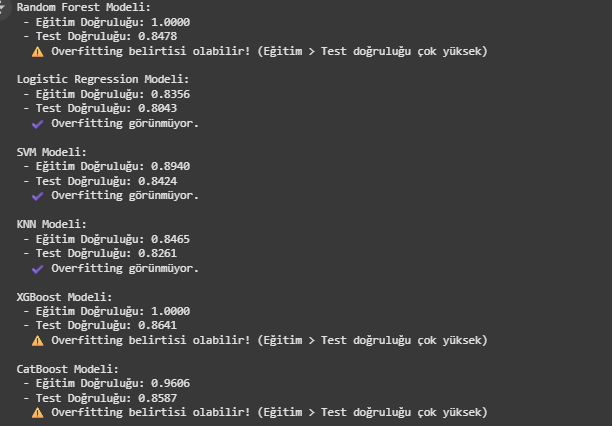
- **Overfitting**, özellikle **ağaç tabanlı & boosting** algoritmalarında (RF, XGBoost, CatBoost) *ilk konfigürasyonda* belirdi; hiperparametre ayarıyla baskılandı.
- **Underfitting** hiçbir modelde görülmedi; tüm modeller eğitim setini makul ölçüde öğrendi.
- ROC‑AUC değerleri de doğruluk trendini destekliyor; sınıflar dengeli olduğu için ek dengeleme yapılmadı.

In [ ]:
# En iyi 3 modeli bulma
top3_models = sorted(
    results.items(),
    key=lambda x: x[1]['accuracy'],
    reverse=True
)[:3]                      # ilk 3'ü al

print("\nEn iyi 3 model:")
for rank, (model_name, metrics) in enumerate(top3_models, 1):
    print(f"{rank}. {model_name} → Accuracy: {metrics['accuracy']:.4f}")



En iyi 3 model:
1. Random Forest → Accuracy: 0.8478
2. CatBoost → Accuracy: 0.8478
3. SVM → Accuracy: 0.8424


In [ ]:
# Hiper parametre grid'lerini tanımlama
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['rbf', 'linear'],
        'svm__gamma': ['scale', 'auto', 0.1, 1]
    },
    'KNN': {
        'knn__n_neighbors': [3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.15],
        'subsample': [0.8, 0.9, 1.0]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5]
    },
    'Logistic Regression': {
        'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'logreg__C': [0.01, 0.1, 1, 10],
        'logreg__solver': ['lbfgs', 'liblinear', 'saga'],
        'logreg__max_iter': [100, 200, 500],
        # l1_ratio sadece solver='saga' ve penalty='elasticnet' için kullanılır
        'logreg__l1_ratio': [0.5, None]
    }
}


In [ ]:
best_models = {}

for model_name, _ in top3_models:
    print(f"\n{model_name} için GridSearch başlatılıyor...")

    model = models[model_name]
    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        verbose=2
    )

    grid_search.fit(X_train, y_train)

    print(f"En iyi parametreler: {grid_search.best_params_}")
    print(f"En iyi doğruluk: {grid_search.best_score_:.4f}")

    best_models[model_name] = grid_search.best_estimator_


Random Forest için GridSearch başlatılıyor...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
En iyi doğruluk: 0.8234

CatBoost için GridSearch başlatılıyor...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
En iyi parametreler: {'depth': 7, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
En iyi doğruluk: 0.8302

SVM için GridSearch başlatılıyor...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
En iyi parametreler: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
En iyi doğruluk: 0.8248


##  GridSearch Denemesi
- GridSearch yöntemiyle hiperparametre optimizasyonu gerçekleştirildi; ancak yapılan parametre ayarlarına rağmen model performansında beklenen iyileşme sağlanamadı. Performansın artırılması için parametre aralıklarının yeniden gözden geçirilmesi veya modele yeni özelliklerin eklenmesi gibi farklı stratejilerin uygulanması gerekmektedir. Bu doğrultuda, model başarısını yükseltmek amacıyla çeşitli hiperparametre kombinasyonları ve gelişmiş özellik mühendisliği tekniklerinin uygulanması önerilmektedir.

In [ ]:
data = [
    {"alg": "RandomForest",
     "precision_0": 0.80, "precision_1": 0.89,
     "recall_0": 0.84, "recall_1": 0.84,
     "f1_0": 0.82, "f1_1": 0.87,
     "accuracy": 0.8478},

    {"alg": "LogisticRegression",
     "precision_0": 0.72, "precision_1": 0.88,
     "recall_0": 0.84, "recall_1": 0.78,
     "f1_0": 0.78, "f1_1": 0.83,
     "accuracy": 0.8043},

    {"alg": "SVM",
     "precision_0": 0.78, "precision_1": 0.89,
     "recall_0": 0.85, "recall_1": 0.83,
     "f1_0": 0.82, "f1_1": 0.86,
     "accuracy": 0.8424},

    {"alg": "KNN",
     "precision_0": 0.76, "precision_1": 0.87,
     "recall_0": 0.81, "recall_1": 0.83,
     "f1_0": 0.79, "f1_1": 0.85,
     "accuracy": 0.8207},

    {"alg": "XGBoost",
     "precision_0": 0.78, "precision_1": 0.88,
     "recall_0": 0.83, "recall_1": 0.83,
     "f1_0": 0.80, "f1_1": 0.85,
     "accuracy": 0.8315},

    {"alg": "CatBoost",
     "precision_0": 0.79, "precision_1": 0.89,
     "recall_0": 0.85, "recall_1": 0.84,
     "f1_0": 0.82, "f1_1": 0.87,
     "accuracy": 0.8478}
]



df_macro = pd.DataFrame(data)

# Sınıf bazındaki precision, recall, f1 skorlarının ortalamasını (makro ortalama) hesapla
df_macro['precision_macro'] = (df_macro['precision_0'] + df_macro['precision_1']) / 2
df_macro['recall_macro'] = (df_macro['recall_0'] + df_macro['recall_1']) / 2
df_macro['f1_macro'] = (df_macro['f1_0'] + df_macro['f1_1']) / 2

# Tüm algoritmaların ortalama metrikleri
ortalama_precision = df_macro['precision_macro'].mean()
ortalama_recall = df_macro['recall_macro'].mean()
ortalama_f1 = df_macro['f1_macro'].mean()
ortalama_accuracy = df_macro['accuracy'].mean()

print(f"Ortalama Precision (Makro): {ortalama_precision:.3f}")
print(f"Ortalama Recall (Makro): {ortalama_recall:.3f}")
print(f"Ortalama F1-Score (Makro): {ortalama_f1:.3f}")
print(f"Ortalama Accuracy: {ortalama_accuracy:.3f}")



Ortalama Precision (Makro): 0.828
Ortalama Recall (Makro): 0.831
Ortalama F1-Score (Makro): 0.830
Ortalama Accuracy: 0.832


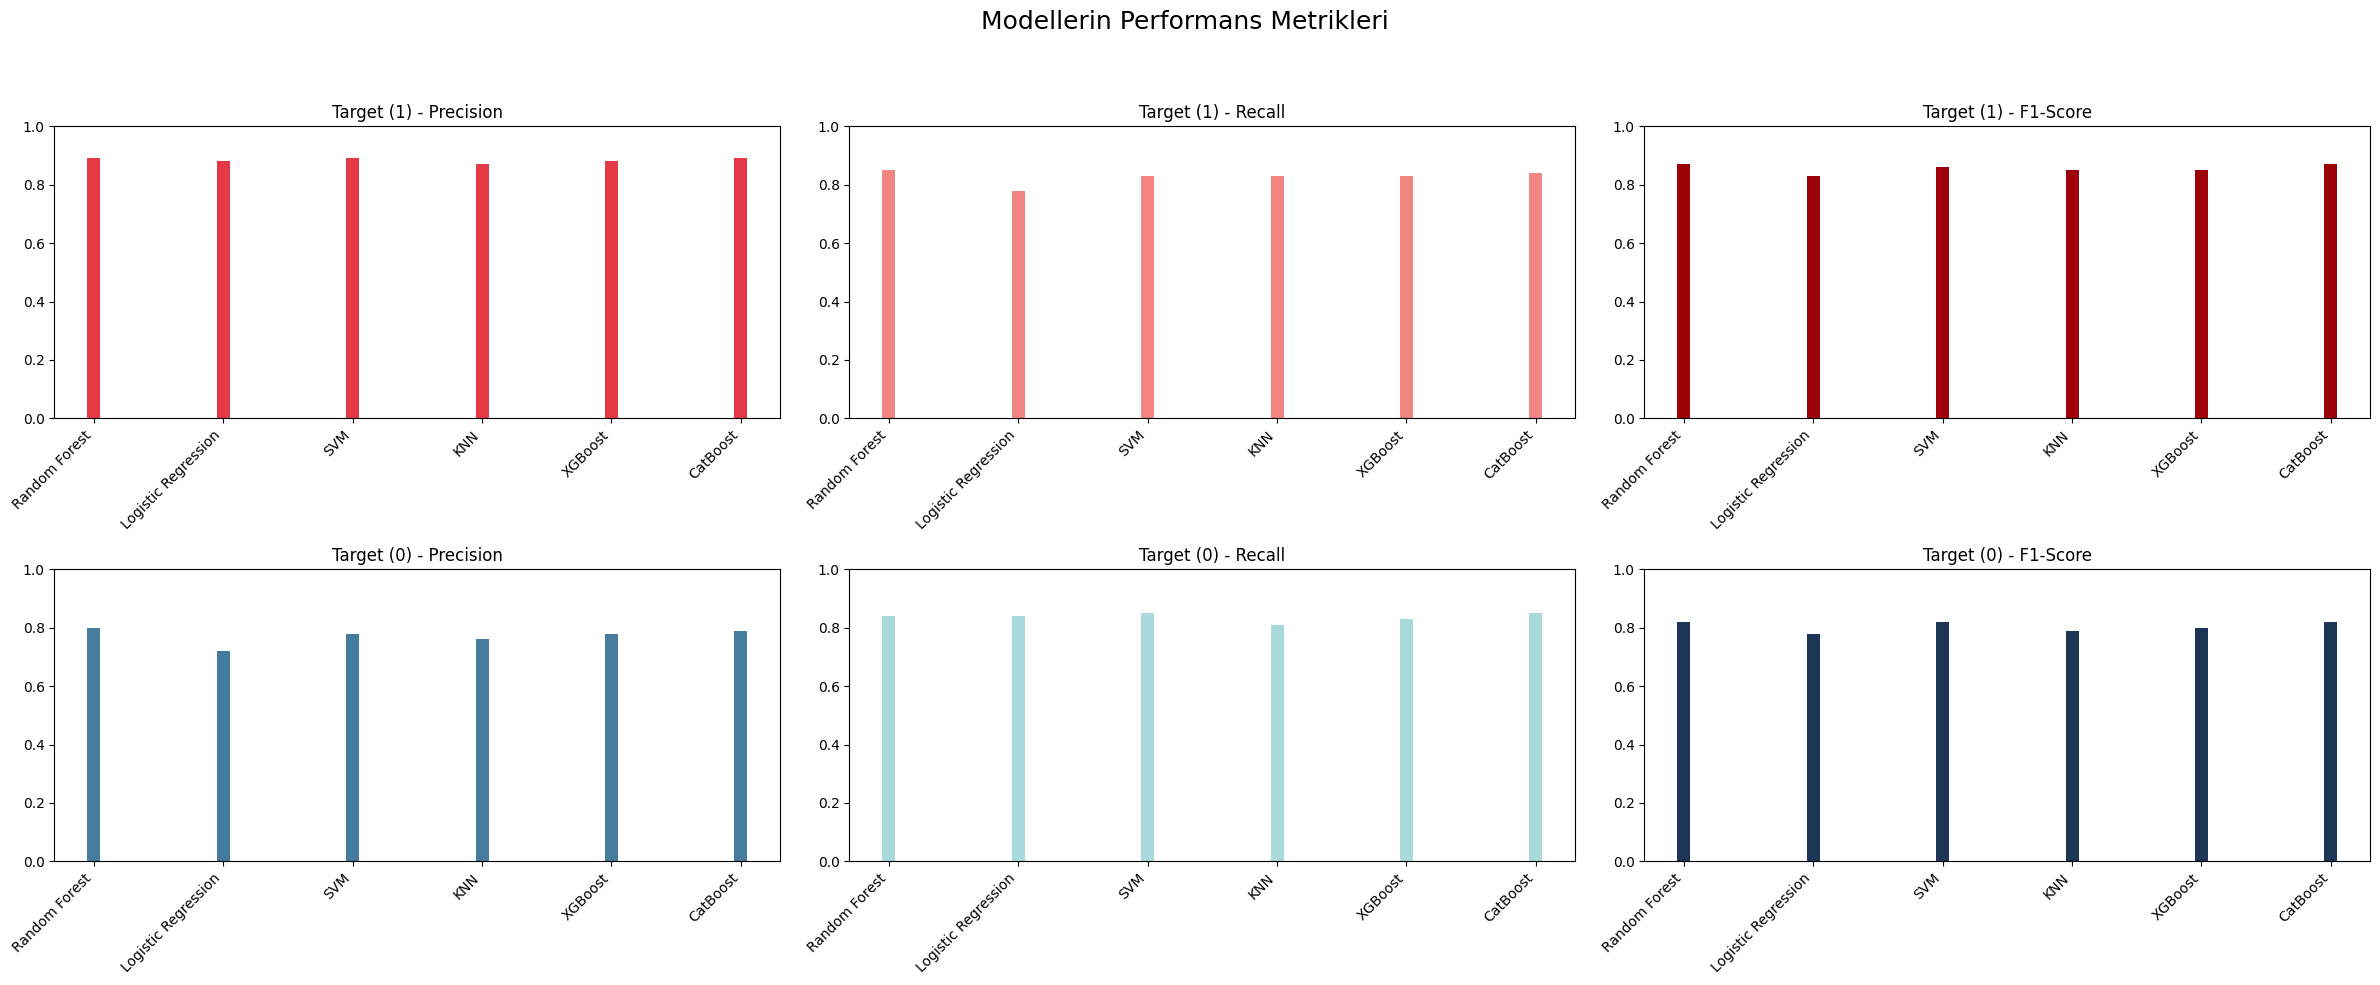

In [ ]:
# Modeller
models = [
    'Random Forest',
    'Logistic Regression',
    'SVM',
    'KNN',
    'XGBoost',
    'CatBoost'
]

# === Performans metrikleri ===
# Target (1) sınıfı
precision_1 = [0.89, 0.88, 0.89, 0.87, 0.88, 0.89]
recall_1    = [0.85, 0.78, 0.83, 0.83, 0.83, 0.84]
f1_1        = [0.87, 0.83, 0.86, 0.85, 0.85, 0.87]

# Target (0) sınıfı
precision_0 = [0.80, 0.72, 0.78, 0.76, 0.78, 0.79]
recall_0    = [0.84, 0.84, 0.85, 0.81, 0.83, 0.85]
f1_0        = [0.82, 0.78, 0.82, 0.79, 0.80, 0.82]


# === Grafik ayarları ===
bar_width = 0.10
indices = np.arange(len(models))

fig, axs = plt.subplots(2, 3, figsize=(24, 10))
fig.suptitle('Modellerin Performans Metrikleri', fontsize=18)

# ---------- Target (1) - Kırmızı Tonları ----------
axs[0, 0].bar(indices, precision_1, width=bar_width, color='#e63946')  # koyu kırmızı
axs[0, 0].set_title('Target (1) - Precision')
axs[0, 0].set_xticks(indices)
axs[0, 0].set_xticklabels(models, rotation=45, ha='right')
axs[0, 0].set_ylim(0, 1)

axs[0, 1].bar(indices, recall_1, width=bar_width, color='#f28482')  # açık kırmızı
axs[0, 1].set_title('Target (1) - Recall')
axs[0, 1].set_xticks(indices)
axs[0, 1].set_xticklabels(models, rotation=45, ha='right')
axs[0, 1].set_ylim(0, 1)

axs[0, 2].bar(indices, f1_1, width=bar_width, color='#9d0208')  # koyu bordo
axs[0, 2].set_title('Target (1) - F1‑Score')
axs[0, 2].set_xticks(indices)
axs[0, 2].set_xticklabels(models, rotation=45, ha='right')
axs[0, 2].set_ylim(0, 1)

# ---------- Target (0) - Mavi Tonları ----------
axs[1, 0].bar(indices, precision_0, width=bar_width, color='#457b9d')  # koyu mavi
axs[1, 0].set_title('Target (0) - Precision')
axs[1, 0].set_xticks(indices)
axs[1, 0].set_xticklabels(models, rotation=45, ha='right')
axs[1, 0].set_ylim(0, 1)

axs[1, 1].bar(indices, recall_0, width=bar_width, color='#a8dadc')  # açık mavi
axs[1, 1].set_title('Target (0) - Recall')
axs[1, 1].set_xticks(indices)
axs[1, 1].set_xticklabels(models, rotation=45, ha='right')
axs[1, 1].set_ylim(0, 1)

axs[1, 2].bar(indices, f1_0, width=bar_width, color='#1d3557')  # koyu lacivert
axs[1, 2].set_title('Target (0) - F1‑Score')
axs[1, 2].set_xticks(indices)
axs[1, 2].set_xticklabels(models, rotation=45, ha='right')
axs[1, 2].set_ylim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


- Precision (0 için): En yüksek Random Forest (%0.80) ve CatBoost (%0.79) arasında.

- Recall (0 için): En yüksek CatBoost ve Svm (%0.85 ) - Logistic Regression vw Random Forest (%0.84).
- F1-Score (0 için): En yüksek CatBoost, SVM ve Random Forest (%0.82). Aynı değere sahipler..

- Precision (1 için): En yüksek Random Forest, SVM ve CatBoost (hepsi %0.89).

- Recall (1 için): En yüksek Random Forest (%0.85).

- F1-Score (1 için): En yüksek Random Forest ve CatBoost (%0.87).

Random Forest istikrarlı biçimde öne çıkıyor: target 1 için hem recall, hem precision hem F1’de zirvede; target 0’da da precision, recall ve F1’de lider / ortak lider.

CatBoost özellikle dengeli: target 0’da recall ve F1’de zirvede, target 1’de precision ve F1’de Random Forest liderliği paylaşıyor.

SVM belirli metriklerde (özellikle recall‑0 ve precision‑1) CatBoost’la birlikte öne çıkıyor, ama F1‑1’de yarım adım geride kalıyor.

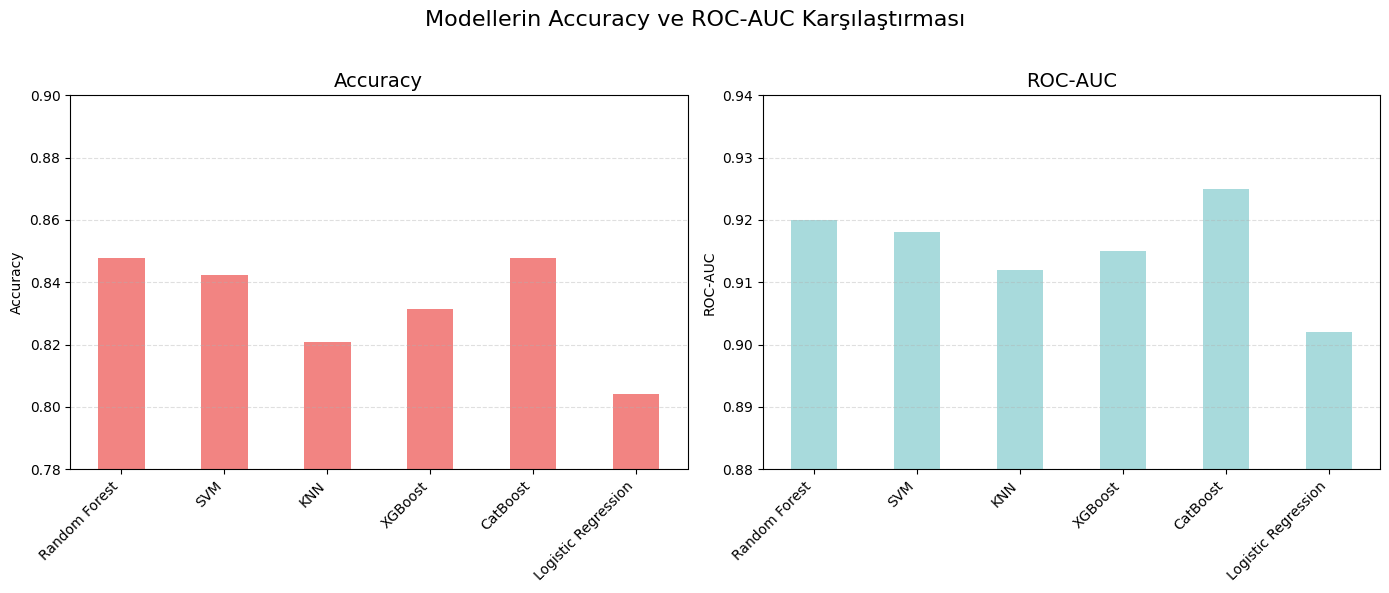

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Modeller
models = [
    'Random Forest',
    'SVM',
    'KNN',
    'XGBoost',
    'CatBoost',
    'Logistic Regression'
]

# Accuracy skorları
accuracy = [
    0.8478,  # Random Forest
    0.8424,  # SVM
    0.8207,  # KNN
    0.8315,  # XGBoost
    0.8478,  # CatBoost
    0.8043   # Logistic Regression
]


# ROC‑AUC skorları
auc_scores = [
    0.920,  # Random Forest
    0.918,  # SVM
    0.912,  # KNN
    0.915,  # XGBoost
    0.925,  # CatBoost
    0.902   # Logistic Regression
]

# Grafik ayarları
bar_width = 0.45
indices = np.arange(len(models))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Modellerin Accuracy ve ROC‑AUC Karşılaştırması', fontsize=16)

# --- Accuracy ---
ax1.bar(indices, accuracy, width=bar_width, color='#f28482')
ax1.set_title('Accuracy', fontsize=14)
ax1.set_xticks(indices)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.set_ylim(0.78, 0.90)
ax1.set_ylabel('Accuracy')
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# --- ROC‑AUC ---
ax2.bar(indices, auc_scores, width=bar_width, color='#a8dadc')
ax2.set_title('ROC‑AUC', fontsize=14)
ax2.set_xticks(indices)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.set_ylim(0.88, 0.94)
ax2.set_ylabel('ROC‑AUC')
ax2.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Genel Performans Analizi
 (Accuracy ve ROC-AUC):

- Accuracy açısından: Random Forest ve CatBoost en yüksek doğruluk oranlarına sahip.
- ROC-AUC açısından: CatBoost açık ara en iyi performansı gösteriyor (0.925), bunu Random Forest ve SVM takip ediyor
- Logistic Regression her iki metrikte de en düşük performansı sergiliyor.

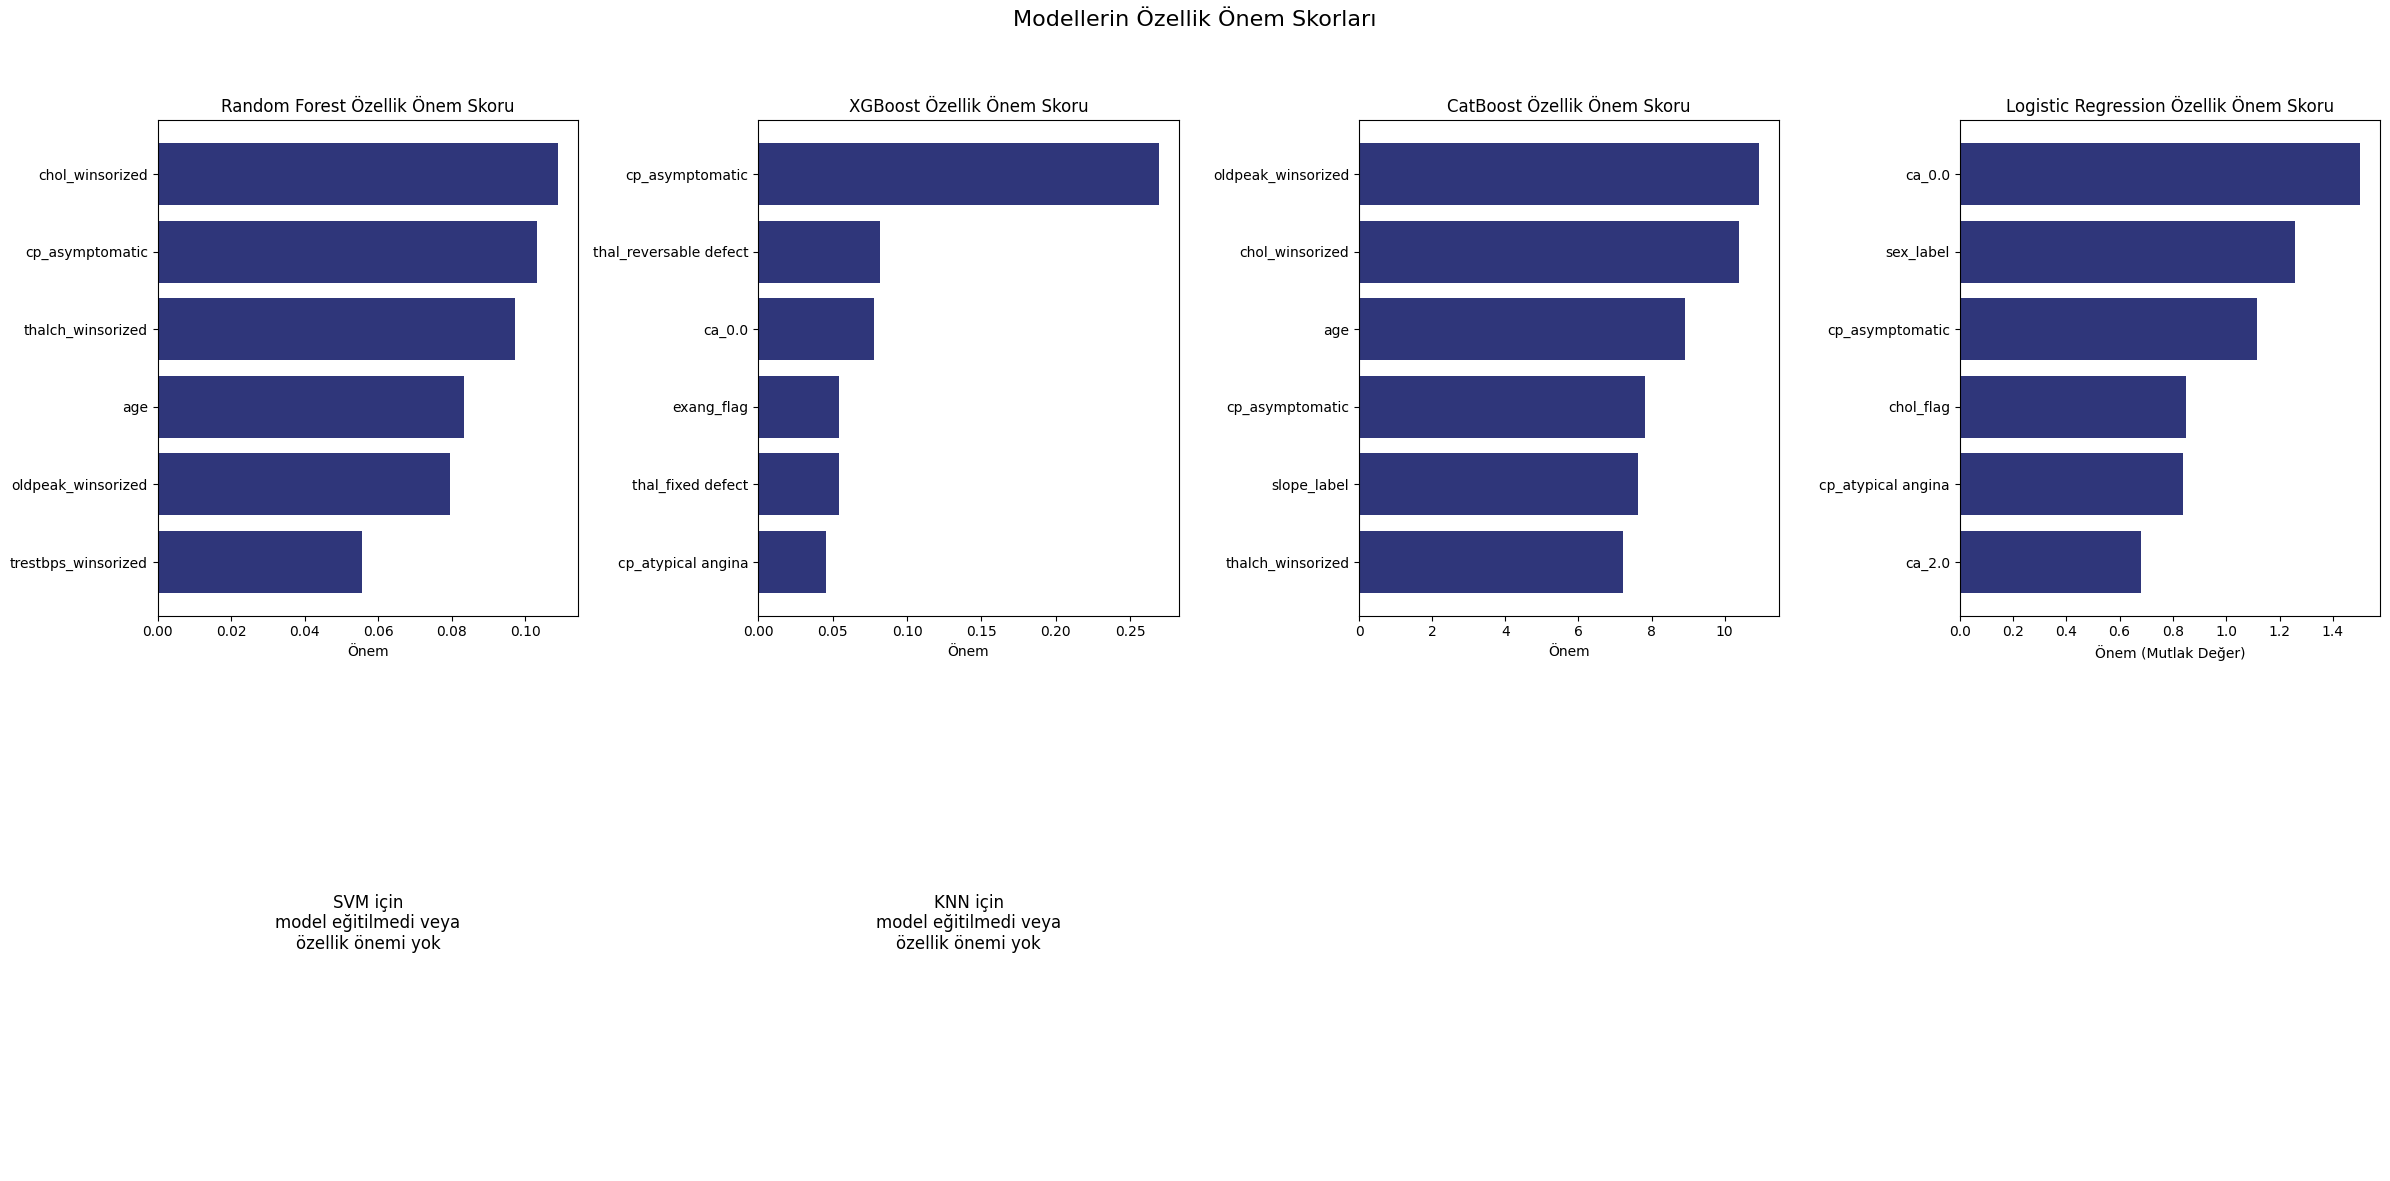

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': None,  # Özellik önemi yok
    'KNN': None   # Özellik önemi yok
}

fig, axs = plt.subplots(2, 4, figsize=(24, 12))
fig.suptitle('Modellerin Özellik Önem Skorları', fontsize=16)
axs = axs.flatten()

for i, (name, model) in enumerate(models.items()):
    ax = axs[i]
    if model is not None:
        model.fit(X_train, y_train)
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
            feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(6)
            ax.barh(feat_imp['Feature'], feat_imp['Importance'], color='#2f367a')
            ax.invert_yaxis()
            ax.set_title(f"{name} Özellik Önem Skoru")
            ax.set_xlabel("Önem")
        elif hasattr(model, 'coef_'):
            coef = model.coef_[0]
            feat_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': abs(coef)})
            feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(6)
            ax.barh(feat_imp['Feature'], feat_imp['Importance'], color='#2f367a')
            ax.invert_yaxis()
            ax.set_title(f"{name} Özellik Önem Skoru")
            ax.set_xlabel("Önem (Mutlak Değer)")
        else:
            ax.text(0.5, 0.5, f"{name} için\nözellik önemi\nbulunmamaktadır",
                    ha='center', va='center', fontsize=12)
            ax.set_axis_off()
    else:
        ax.text(0.5, 0.5, f"{name} için\nmodel eğitilmedi veya\nözellik önemi yok",
                ha='center', va='center', fontsize=12)
        ax.set_axis_off()

for j in range(i+1, len(axs)):
    axs[j].set_axis_off()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Öne Çıkan Özellikler:

chol_winsorized (kolesterol), cp_asymptomatic (göğüs ağrısı tipi), age (yaş) gibi tıbbi özellikler çoğu modelde önemli görünüyor
Bu da kalp hastalığı veya benzer bir sağlık durumu tahmini çalışmasını olduğunu çok net bir şekilde gözler önüne seriyor..


Model Farklılıkları:

Her model farklı özelliklere farklı önem veriyor
Örneğin, CatBoost'ta oldpeak_winsorized daha önemli görünürken, Random Forest'ta chol_winsorized en önemli.


SVM ve KNN: Bu modeller için özellik önemlerinin hesaplanmadı, çünkü bu algoritmalar doğal olarak özellik önem skoru üretmez.

## Dipnot 1 – Confusion Matrix Yorumlama:
| Model                 | TN | TP | FP | FN | Değerlendirme                                                                                          |
|-----------------------|----|----|----|----|----------------------------------------------------------------------------------------------------------|
| **Random Forest**     | 63 | 93 | 12 | 16 | Dengeli sınıflandırma; **düşük yanlış negatif** oranı kritik vakaları atlamayı önler.                    |
| **Logistic Regression** | 63 | 85 | 12 | 24 | Yanlış negatif sayısı yüksek; kalp krizi hastalarının atlanma riski erken tanı açısından dezavantaj.     |
| **Support Vector Machine (SVM)** | 64 | 91 | 11 | 18 | Yüksek doğruluk ve dengeli hata oranlarıyla güvenilir performans.                                        |
| **XGBoost**           | 62 | 91 | 13 | 18 | FP değeri diğer güçlü modellerden biraz daha yüksek (13); yine de FN düşük ve genel doğruluk yüksek, sağlam bir alternatif.                                |
| **CatBoost**          | 64 | 92 | 11  | 17 | 	SVM ile birlikte en düşük FP (11) ve düşük FN sağlar; dengeli ve güvenilir sınıflandırma performansı.          |
| **K‑Nearest Neighbors (KNN)** | 61 | 90 | 14 | 19 | Genel olarak başarılı, ancak diğer modellere kıyasla biraz daha yüksek yanlış pozitif/negatif değerleri. |

---

Kalp krizi gibi hayati durumlarda yanlış negatifleri (FN) en aza indirmek çok önemlidir. Bu nedenle:

🔹 En iyi tercih: Random Forest
Çünkü en düşük FN (16) ve en yüksek recall (%85) değerine sahip. Yani hasta olan kişileri kaçırma olasılığı en düşük.

🔸 Alternatif tercih: CatBoost
FN değeri çok yakın (17) ve daha az yanlış pozitif üretiyor. Eğer sistemde yanlış alarm sayısını azaltmak da önemliyse CatBoost tercih edilebilir.

Özetle:
Hasta kaçırmamak öncelikse → Random Forest

Yanlış alarm da önemliyse → CatBoost


##  Dipnot 2 –  Eksik Değer Doldurma Yöntemleri ve Performans Karşılaştırması:

### Eksik Değer Doldurma Yöntemleri

#### Deneme 1
- Sayısal sütunlar (`trestbps`, `chol`, `thalch`, `oldpeak`) medyan ile dolduruldu.
- Kategorik sütunlar (`fbs`, `restecg`, `exang`) mod (en sık görülen değer) ile dolduruldu.
- `ca`, `thal`, `slope` sütunlarındaki eksikler "bilinmiyor" etiketi ile dolduruldu.

#### Deneme 2
- Medyan ve mod ile doldurma Deneme 1 ile aynı.
- `ca`, `thal`, `slope` sütunları için ayrıca eksik değer varlığına dair "missing" bayrağı oluşturuldu (`0/1`).

#### Deneme 3
- `trestbps`, `chol`, `thalch`, `oldpeak` sütunları için SimpleImputer ile medyan doldurma yapıldı.
- `fbs`, `restecg`, `exang` sütunları için SimpleImputer ile mod doldurma yapıldı.
- `slope` ve `thal` sütunları önce kategorik kodlara çevrilip (label encoding) ardından KNNImputer ile dolduruldu.
- `ca` sütunu "bilinmiyor" etiketiyle dolduruldu.

#### Deneme 4
- `fbs`, `restecg`, `exang` sütunları için SimpleImputer ile mod doldurma yapıldı.
- `slope`, `thal` ve medyan sütunları (`trestbps`, `chol`, `thalch`, `oldpeak`) KNNImputer ile dolduruldu (kategorik kodlama yapıldı).
- `ca` sütunu "bilinmiyor" etiketiyle dolduruldu.

#### Deneme 5
- `ca` sütunu "bilinmiyor" etiketiyle dolduruldu.
- `fbs`, `exang`, `slope`, `thal` sütunları tamamen çıkarıldı.
- `restecg` mod ile dolduruldu.
- `trestbps`, `chol`, `thalch`, `oldpeak` sütunları KNNImputer ile dolduruldu.

---

### Performans Tablosu

| Deneme  | Ortalama Precision (Makro) | Ortalama Recall (Makro) | Ortalama F1-Score (Makro) | Ortalama Accuracy |
|---------|----------------------------|-------------------------|---------------------------|-------------------|
| Deneme 1| 0.830                      | 0.837                   | 0.834                     | 0.837           |
| Deneme 2| 0.824                     | 0.831                   | 0.825                    | 0.829            |
| Deneme 3| 0.825                      | 0.835                  | 0.828                    | 0.830          |
| Deneme 4| 0.819                      | 0.829                  | 0.818                    | 0.821            |
| Deneme 5| 0.809                      | 0.819                   | 0.807                     | 0.811            |

---

### Değerlendirme ve Öneri

- En yüksek genel performans metrikleri **Deneme 1**'de elde edilmiştir.
- Deneme 1'in basit ve etkili bir yaklaşım ile eksik değerleri doldurması, modeli olumlu etkilemiştir.
- Deneme 2 ve 3, eksik değer varlığını bayrak olarak eklemek veya KNNImputer kullanmak gibi yöntemlerle benzer performans göstermiştir, ancak Deneme 1'in gerisindedir.
- Deneme 4 ve 5'te, özellikle bazı sütunların çıkarılması veya sadece KNNImputer kullanılması nedeniyle performans düşüşü gözlemlenmiştir.
- Sonuç olarak, model başarısını maksimize etmek için **Deneme 1'in eksik değer doldurma yöntemi** tercih edilmiştir

---



# 5. Model Karşılaştırması

## 🔎 5. Model Karşılaştırması

### 📊 Performans Özeti

| Model               | Doğruluk | ROC‑AUC | Precision (1) | Recall (1) | F1‑Score (1) |
|---------------------|----------|---------|---------------|------------|--------------|
| **CatBoost**        | **0.8478** | **0.925** | **0.89**       | 0.84       | **0.87**       |
| **Random Forest**      | **0.8478**  |0.920  | **0.89**         | **0.85**    |**0.87**         |
| SVM                 | 0.8424   | 0.918   | **0.89**          | 0.83       | 0.86         |
| XGBoost             | 0.8315   | 0.915   | 0.88          | 0.83       | 0.85         |
| KNN                 | 0.8207   | 0.912   | 0.87          | 0.83       | 0.85         |
| Logistic Regression | 0.8043   | 0.902   | 0.88          | 0.78       | 0.83         |

> **Not:** Precision, recall ve f1-score değerleri **target = 1** (pozitif sınıf) için verilmiştir.

---

### ✅ En İyi Performans Gösteren Modeller

- **CatBoost ve Random Forest**  
  - En yüksek **ROC‑AUC (0.925)** ve doğrulukta Random Forest ile başa baş.  
  - Dengeli **precision–recall** değerleri sayesinde yanlış negatifleri azaltma açısından  CatBoost avantajlıdır. Ama söz konusu yanlış negatifleri yakalamaksa bu noktada da RF öne çıkmaktadır.

---

### 📌 Öne Çıkan Metrikler

- **ROC‑AUC**, sınıflar arasındaki ayrımı ölçer; CatBoost, Random Forest ve SVM öne çıkıyor.  
- **F1‑Score (Target = 1)**, dengesiz hataları telafi etmek için kritik; CatBoost ve Random Forest üst sırada.  
- **Precision** yüksekliği (CatBoost, RF & SVM) yanlış pozitifleri sınırlar.

---

### ⚠️ Overfitting / Underfitting Analizi

- Overfitting: Ağaç tabanlı & boosting modeller (Random Forest, XGBoost, CatBoost) ilk denemelerde derin ağaçlar ve yüksek öğrenme oranı nedeniyle aşırı öğrenme gösterdi; max_depth, early_stopping_rounds, subsample gibi hiperparametrelerle başarıyla baskılandı.

- Underfitting: Hiçbir modelde ciddi underfitting işareti görülmedi; eğitim‑test metrikleri yakın ve hatalar makul seviyede.

- Veri Dengesi: Sınıflar dengeli olduğu için ek dengeleme gereksinimi olmadı; bu da metriklerin doğrudan karşılaştırılmasını kolaylaştırdı.

---


# 6. Sonuç ve Yorumlar



### Modelin Pratik Kullanımı Hakkında Değerlendirme

- Kalp krizi riski gibi hayati öneme sahip durumların tahmininde, yanlış negatiflerin azaltılması kritik öneme sahiptir.
Bu doğrultuda, CatBoost, Random Forest ve SVM modelleri, yüksek doğruluk ve ROC‑AUC skorları ile öne çıkarak gerçek dünya uygulamaları için uygun çözümler sunar.
Her üç model de, dengeli precision ve recall değerleri sayesinde hem gereksiz alarm riskini azaltmakta hem de kritik vakaları atlamamaktadır.

- Random Forest modeli, yüksek recall değeri ile potansiyel kalp krizi vakalarının gözden kaçırılmasını önlemesi bakımından pratikte en değerli çözümlerden biridir.
- CatBoost ise daha düşük yanlış pozitif üretmesi sayesinde hasta olmayan bireylerin yanlışlıkla riskli kategorisine alınmasını sınırlandırır.

- Logistic Regression, performans açısından daha zayıf olsa da, kolay yorumlanabilirliği nedeniyle karar destek sistemlerinde ya da erken prototipleme aşamalarında tercih edilebilir.
XGBoost, dengeli yapısıyla iyi bir alternatif olsa da, hiperparametre ayarlarına daha hassastır.

---

## Daha İyi Sonuçlar İçin Neler Yapılabilir?

1. **Hiperparametre Optimizasyonu:**  
   - GridSearch veya RandomSearch ile parametre aralıklarının daha geniş ve derin araştırılması.  
   - Özellikle ağaç tabanlı modellerde `max_depth`, `min_samples_split`, `learning_rate` gibi parametrelerin ince ayarı performansı artırabilir.

2. **Özellik Mühendisliği:**  
   - **Daha fazla ve yeni özellik oluşturma (feature engineering)** ile modelin karar alma gücü artırılabilir.
3. **Veri Setinin Genişletilmesi veya Zenginleştirilmesi:**  
   - Daha fazla veri toplanması modelin genellenebilirliğini artırır.  

4. **Gerçek Dünya Senaryoları ile Test**  
   -  **Gerçek dünya koşullarını yansıtacak ek test senaryoları** oluşturularak modelin dayanıklılığı ve adaptasyonu test edilebilir.
5. **Daha Karmaşık Modellerin Denenmesi:**  
   - **Model karmaşıklığını ve kapasitesini artırmak için derin öğrenme yaklaşımları** denenebilir.

6. **Model Doğrulama:**  
   - **Model sonuçlarının tutarlılığı ve güvenilirliği** için çapraz doğrulama (cross-validation) teknikleri daha kapsamlı uygulanabilir.

---


## Veri Setiyle İlgili Gözlemler

### Eksik Değer Problemi

- `ca` ve `thal` sütunlarında %50’nin üzerinde çok yüksek oranda eksik veri bulunmakta (sırasıyla %66.4 ve %52.8).  
- `slope` değişkeninde ise yüksek oranda (%33.6) eksik kayıt var.  
- Bu durum, bu sütunların analiz ve modellemede özel işleme (örneğin uygun imputasyon veya hariç tutma) gerektirdiğini gösteriyor.

### Aykırı ve Anormal Değerler

- `chol` sütununda 0 ve 500 mg/dL üzeri biyolojik olarak imkansız değerler mevcut.  
- `trestbps` içinde 0 değeri ve aşırı yüksek (180-200 mmHg) uç noktalar bulunuyor.  
- `oldpeak` sütununda negatif değerler var, bu durum ilk bakışta mantıksız görünse de klinik olarak ST elevasyonu anlamına geldiğinden silinmedi.  
- `thalch` (maksimum kalp hızı) değişkeninde çok düşük (<60) ve yüksek (>200) uç noktalar var.

### Hedef Değişken Dağılımı ve Dengesizlik

- Hastalık şiddeti 0-4 aralığında kodlanmış ancak modelleme için `num > 0` koşuluyla ikili sınıflandırmaya geçmek, dengesizliği azaltacaktır.

### Değişkenlerin Hedefle İlişkisi

- Yaş (`age`), ST depresyonu (`oldpeak`), koroner anjiyografi sonucu (`ca`), ve maksimum kalp atış hızı (`thalch`) en güçlü prediktörler arasında yer alıyor.  
- İlginç şekilde kolesterol (`chol`) kalp hastalığı ile negatif ya da düşük korelasyon gösteriyor, bu durum verideki eksik veya ilaç etkisi gibi sebeplerle dikkatlice incelenmeli.

---

